In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
FILES = ['item_categories', 'items', 'sales_train', 'shops']

In [3]:
shops = pd.read_csv('shops.csv', index_col = 'shop_id')
shops.head(12)

,shop_name
shop_id,
0,"!Якутск Орджоникидзе, 56 фран"
1,"!Якутск ТЦ ""Центральный"" фран"
2,"Адыгея ТЦ ""Мега"""
3,"Балашиха ТРК ""Октябрь-Киномир"""
4,"Волжский ТЦ ""Волга Молл"""
5,"Вологда ТРЦ ""Мармелад"""
6,"Воронеж (Плехановская, 13)"
7,"Воронеж ТРЦ ""Максимир"""
8,"Воронеж ТРЦ Сити-Парк ""Град"""


In [4]:
itemcat = pd.read_csv(FILES[0] + '.csv', index_col = 'item_category_id')
itemcat.head(3)

,item_category_name
item_category_id,
0,PC - Гарнитуры/Наушники
1,Аксессуары - PS2
2,Аксессуары - PS3


In [5]:
itemcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
dtypes: object(1)
memory usage: 1.3+ KB


In [6]:
items = pd.read_csv('items.csv', index_col = 'item_id')
items

,item_name,item_category_id
item_id,,
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,40
1,!ABBYY FineReader 12 Professional Edition Full...,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,40
4,***КОРОБКА (СТЕКЛО) D,40
...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",31
22166,Язык запросов 1С:Предприятия [Цифровая версия],54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,49


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_category_id  22170 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 519.6+ KB


In [8]:
sales = pd.read_csv('sales_train.csv')
sales['date'] = pd.to_datetime(sales['date'], dayfirst = True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [9]:
sales.sort_values(['date_block_num','date'], inplace = True)
sales.index = list(range(len(sales)))
sales['income'] = sales['item_price']*sales['item_cnt_day']
#sales['item_cat'] = pd.Series(items.loc[sales['item_id'],'item_category_id'], index = np.arange(len(sales))) # item_category_id
temp = items.loc[sales['item_id'],'item_category_id'].copy()
temp.index = np.arange(len(sales))
sales['item_cat'] = temp
del temp
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat
0,2013-01-01,0,19,18976,399.0,1.0,399.0,40
1,2013-01-01,0,19,18284,199.0,1.0,199.0,55
2,2013-01-01,0,19,18320,199.0,1.0,199.0,55
3,2013-01-01,0,19,18329,299.0,1.0,299.0,55
4,2013-01-01,0,19,19367,399.0,1.0,399.0,62
...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,25,7087,699.0,1.0,699.0,30
2935845,2015-10-31,33,25,7172,1499.0,1.0,1499.0,20
2935846,2015-10-31,33,25,7202,199.0,1.0,199.0,30
2935847,2015-10-31,33,25,7780,198.0,1.0,198.0,30


In [10]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.157732e+03,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,5.683604e+03,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,-6.897000e+04,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.490000e+02,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.490000e+02,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,1.078200e+03,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,1.829990e+06,8.300000e+01


In [11]:
sales.corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat
date_block_num,1.000000,0.019273,0.009356,0.095010,0.009402,0.040056,0.029128
shop_id,0.019273,1.000000,0.029396,-0.024034,-0.005230,-0.013424,0.019380
item_id,0.009356,0.029396,1.000000,-0.134104,0.016650,-0.062941,0.369431
item_price,0.095010,-0.024034,-0.134104,1.000000,0.011197,0.433725,-0.253554
item_cnt_day,0.009402,-0.005230,0.016650,0.011197,1.000000,0.407954,0.014768
income,0.040056,-0.013424,-0.062941,0.433725,0.407954,1.000000,-0.116882
item_cat,0.029128,0.019380,0.369431,-0.253554,0.014768,-0.116882,1.000000


In [12]:
print(sales[sales['income'] <= -6*10**4])
items[items['item_category_id'] == 12]

              date  date_block_num  shop_id  item_id  item_price  \
1307472 2014-01-10              12       12     6675     22990.0   

         item_cnt_day   income  item_cat  
1307472          -3.0 -68970.0        12  


,item_name,item_category_id
item_id,,
6674,Sony PlayStation 4 (1Tb) Black (CUH-1208B),12
6675,Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1...,12
6676,Sony PlayStation 4 (500 Gb) Black (CUH-1208A/B01),12
6677,Sony PlayStation 4 (500 Gb) White (CUH-1108A),12
6678,Sony PlayStation 4 (500 Gb) White (CUH-1208A/B01),12
6679,Sony PlayStation 4 (500 Gb) Юбилейное издание ...,12
13440,Комплект Sony PS4 (500 Gb) Black (CUH-1108A/B0...,12
13441,Комплект Sony PS4 (500 Gb) Black (CUH-1108A/B0...,12
13442,Комплект Sony PS4 (500 Gb) Black (CUH-1108A/B0...,12


In [13]:
sales['item_cnt_day'].value_counts().sort_values(ascending = False)#.head(50)

1.0       2629372
2.0        194201
3.0         47350
4.0         19685
5.0         10474
           ...   
128.0           1
501.0           1
167.0           1
147.0           1
2169.0          1
Name: item_cnt_day, Length: 198, dtype: int64

In [14]:
sales['item_cnt_day'].value_counts().sort_index(ascending = False)

 2169.0    1
 1000.0    1
 669.0     1
 637.0     1
 624.0     1
          ..
-5.0       4
-6.0       2
-9.0       1
-16.0      1
-22.0      1
Name: item_cnt_day, Length: 198, dtype: int64

<AxesSubplot:>

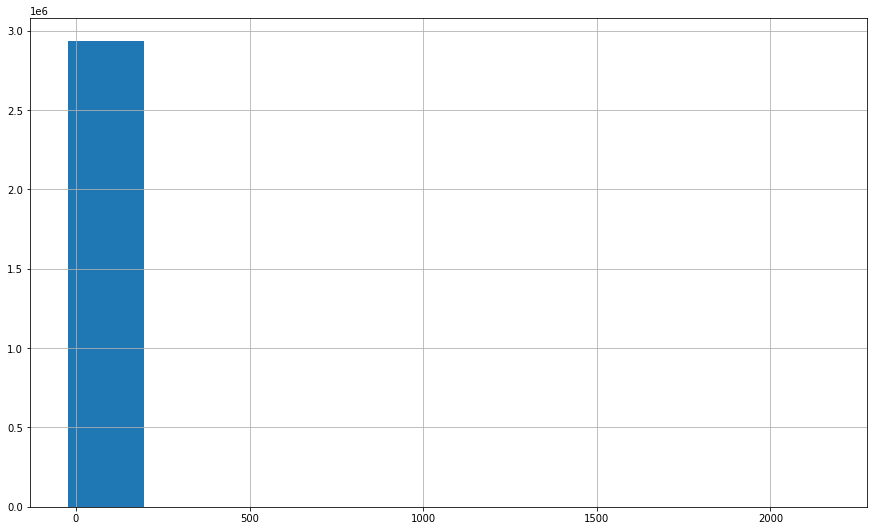

In [15]:
rcParams['figure.figsize'] = 15,9
sales['item_cnt_day'].hist()

In [16]:
shops.loc[11]

shop_name    Жуковский ул. Чкалова 39м²
Name: 11, dtype: object

<AxesSubplot:ylabel='Frequency'>

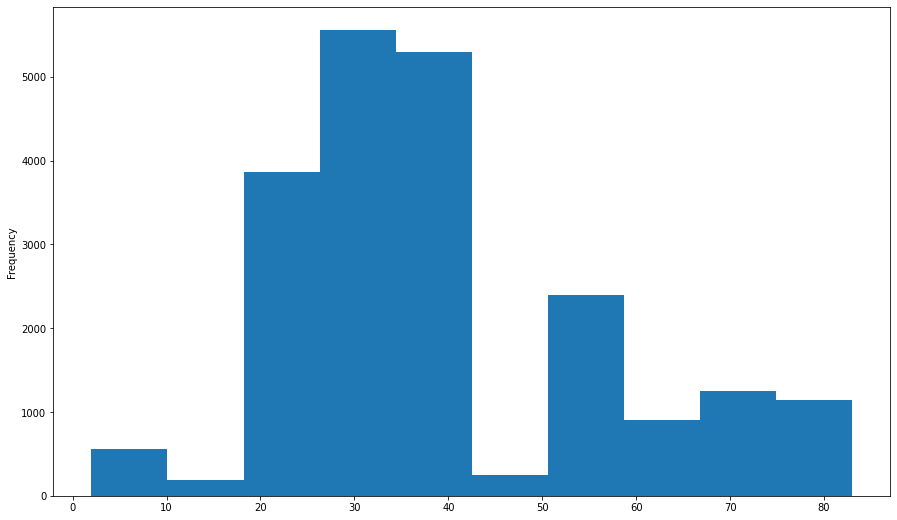

In [17]:
sales[sales['shop_id'] == 10]['item_cat'].plot.hist()

In [18]:
SHOPS = [sales[sales['shop_id'] == i] for i in range(len(shops))]

In [19]:
temp = max(map(len,SHOPS))
for i in range(len(SHOPS)):
    if len(SHOPS[i]) == temp:
        print(i)

31


In [20]:
shops.iloc[31]

shop_name    Москва ТЦ "Семеновский"
Name: 31, dtype: object

In [21]:
TEMP = list(map(lambda x : [len(x[1]), x[0]] ,enumerate(SHOPS)))
TEMP.sort(reverse = True)

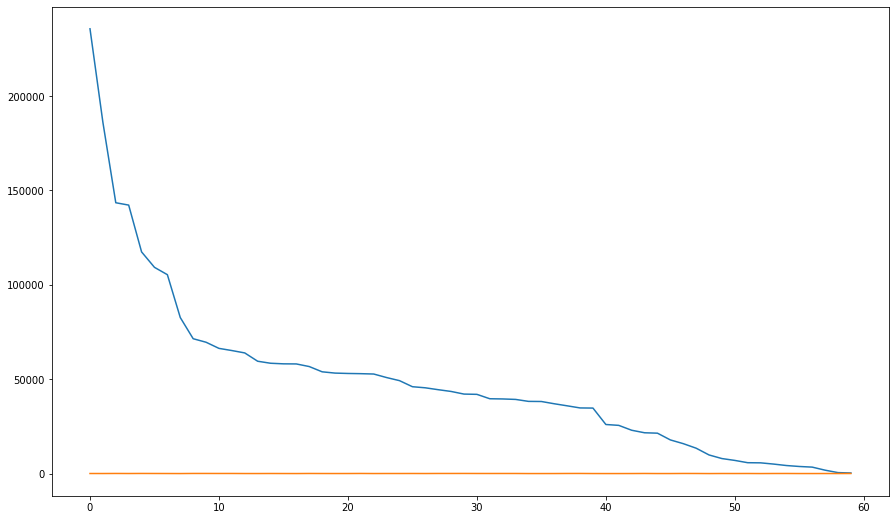

In [22]:
plt.plot(np.arange(len(TEMP)), TEMP)

In [23]:
# mi delta 57
delta = 200
for i in range(len(TEMP) - 1):
     if abs(TEMP[i][0] - TEMP[i + 1][0]) <= delta:
            print(f'{TEMP[i], shops.iloc[TEMP[i][1],0]}   ||   {TEMP[i + 1], shops.iloc[TEMP[i + 1][1],0]}')

([58133, 21], 'Москва МТРЦ "Афи Молл"')   ||   ([58076, 7], 'Воронеж ТРЦ "Максимир"')
([53227, 18], 'Красноярск ТЦ "Июнь"')   ||   ([53032, 24], 'Москва ТК "Буденовский" (пав.К7)')
([53032, 24], 'Москва ТК "Буденовский" (пав.К7)')   ||   ([52921, 53], 'Уфа ТЦ "Семья" 2')
([52921, 53], 'Уфа ТЦ "Семья" 2')   ||   ([52734, 16], 'Коломна ТЦ "Рио"')
([42108, 59], 'Ярославль ТЦ "Альтаир"')   ||   ([41967, 41], 'РостовНаДону ТЦ "Мега"')
([39638, 37], 'Новосибирск ТЦ "Мега"')   ||   ([39530, 44], 'Самара ТЦ "Мелодия"')
([38242, 4], 'Волжский ТЦ "Волга Молл"')   ||   ([38179, 5], 'Вологда ТРЦ "Мармелад"')
([34769, 55], 'Цифровой склад 1С-Онлайн')   ||   ([34694, 12], 'Интернет-магазин ЧС')
([5752, 34], 'Н.Новгород ТРЦ "РИО"')   ||   ([5678, 1], '!Якутск ТЦ "Центральный" фран')
([499, 11], 'Жуковский ул. Чкалова 39м²')   ||   ([306, 36], 'Новосибирск ТРЦ "Галерея Новосибирск"')


In [24]:
ITEMS = [sales[sales['item_id'] == i] for i in range(len(items))]

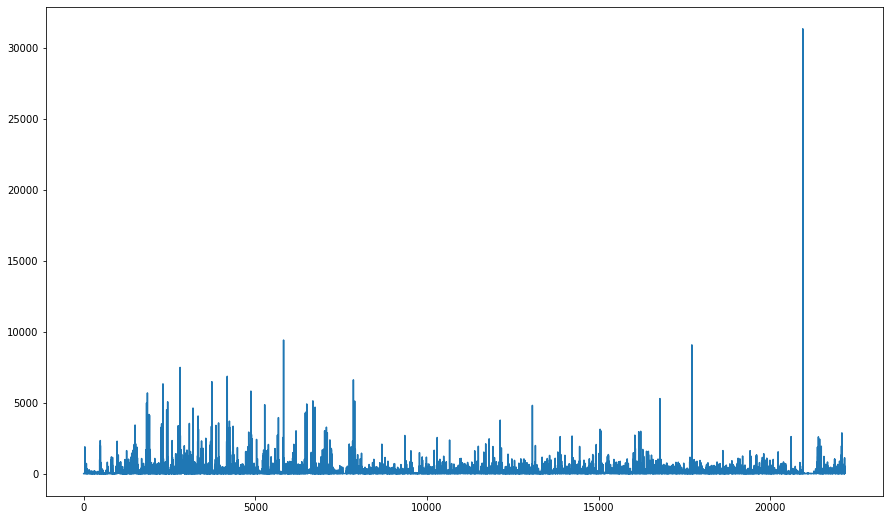

In [25]:
plt.plot(np.arange(len(ITEMS)),list(map(len,ITEMS)))

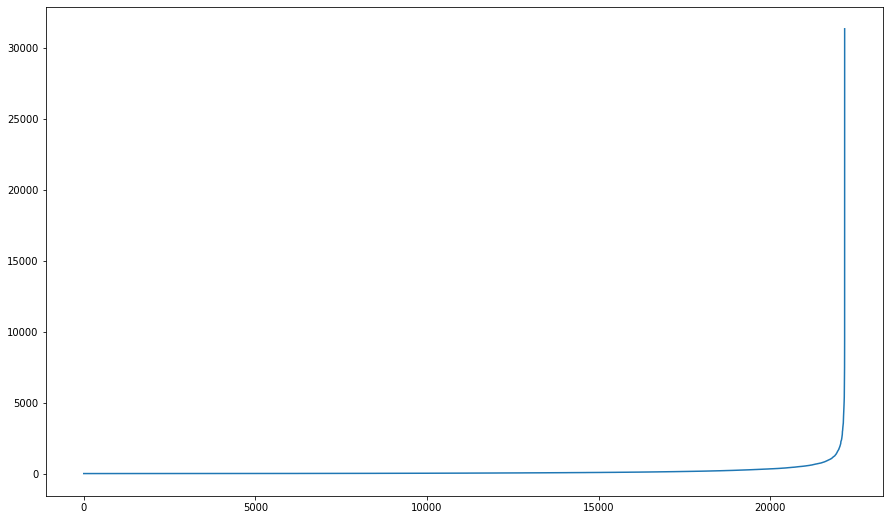

In [26]:
plt.plot(np.arange(len(ITEMS)),sorted(list(map(len,ITEMS))))

In [27]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat
0,2013-01-01,0,19,18976,399.0,1.0,399.0,40
1,2013-01-01,0,19,18284,199.0,1.0,199.0,55
2,2013-01-01,0,19,18320,199.0,1.0,199.0,55
3,2013-01-01,0,19,18329,299.0,1.0,299.0,55
4,2013-01-01,0,19,19367,399.0,1.0,399.0,62
...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,25,7087,699.0,1.0,699.0,30
2935845,2015-10-31,33,25,7172,1499.0,1.0,1499.0,20
2935846,2015-10-31,33,25,7202,199.0,1.0,199.0,30
2935847,2015-10-31,33,25,7780,198.0,1.0,198.0,30


<AxesSubplot:xlabel='date_block_num'>

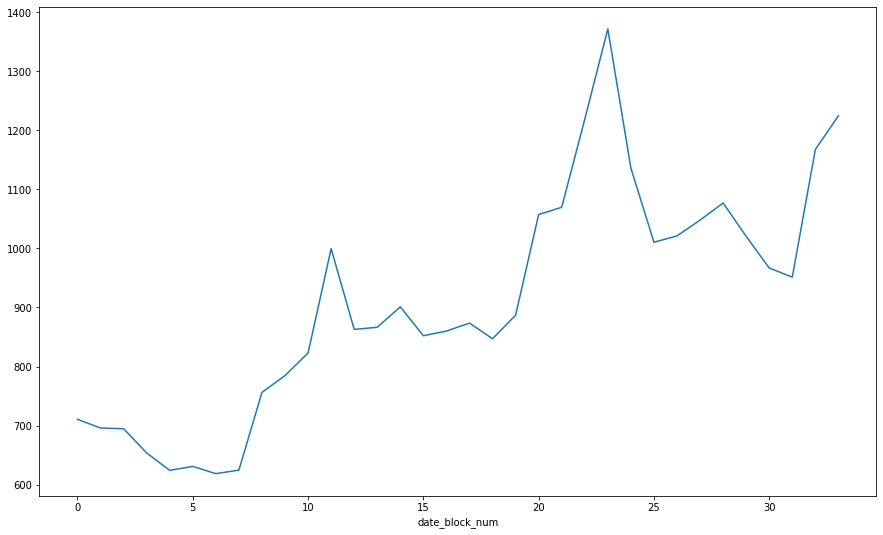

In [28]:
mean_per_month = sales.groupby('date_block_num')['item_price'].mean()
mean_per_month.plot()

In [29]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat
0,2013-01-01,0,19,18976,399.0,1.0,399.0,40
1,2013-01-01,0,19,18284,199.0,1.0,199.0,55
2,2013-01-01,0,19,18320,199.0,1.0,199.0,55
3,2013-01-01,0,19,18329,299.0,1.0,299.0,55
4,2013-01-01,0,19,19367,399.0,1.0,399.0,62
...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,25,7087,699.0,1.0,699.0,30
2935845,2015-10-31,33,25,7172,1499.0,1.0,1499.0,20
2935846,2015-10-31,33,25,7202,199.0,1.0,199.0,30
2935847,2015-10-31,33,25,7780,198.0,1.0,198.0,30


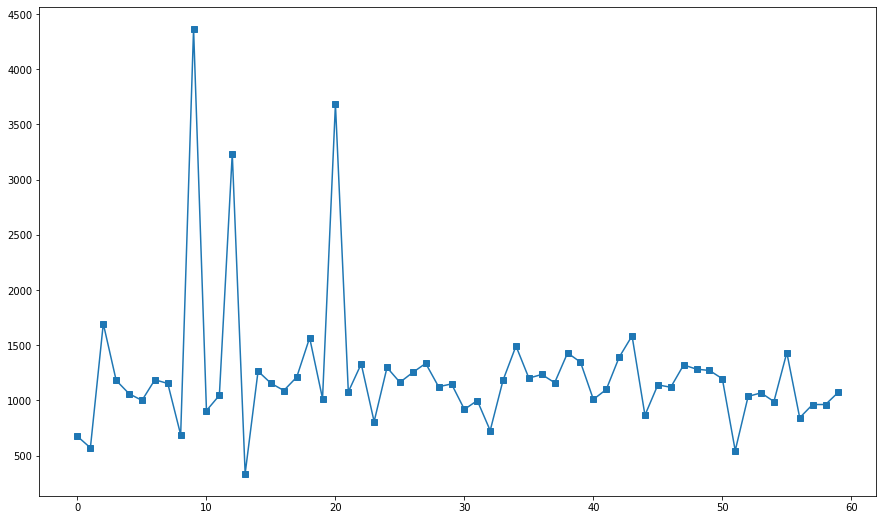

In [30]:
MEAN_INCOME_PER_SHOP = sales.groupby('shop_id')['income'].mean()
plt.plot(MEAN_INCOME_PER_SHOP.index, MEAN_INCOME_PER_SHOP, marker = 's')

In [31]:
#       3 largest income shop
MOST_MEAN_INCOME = np.argpartition(MEAN_INCOME_PER_SHOP, -3)[-3:]
MOST_MEAN_INCOME

shop_id
57    12
58    20
59     9
Name: income, dtype: int64

In [32]:
shops.loc[MOST_MEAN_INCOME]

,shop_name
shop_id,
12,Интернет-магазин ЧС
20,"Москва ""Распродажа"""
9,Выездная Торговля


In [33]:
NEG_MEAN_INCOME_PER_SHOP = sales[sales['item_cnt_day'] < 0].groupby('shop_id')['income'].mean()
LEAST_MEAN_INCOME = np.argpartition(NEG_MEAN_INCOME_PER_SHOP, 3)[:3]
LEAST_MEAN_INCOME

shop_id
2    15
3    17
4    43
Name: income, dtype: int64

In [34]:
NEG_MEAN_INCOME_PER_SHOP.iloc[LEAST_MEAN_INCOME]

shop_id
20   -5999.000000
22   -2527.294124
48   -2501.424045
Name: income, dtype: float64

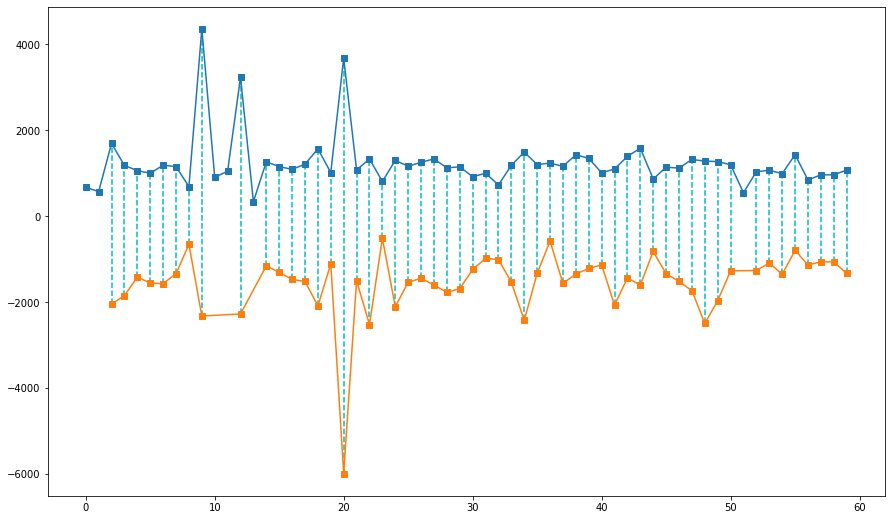

In [35]:
plt.plot(MEAN_INCOME_PER_SHOP.index, MEAN_INCOME_PER_SHOP, marker = 's')
plt.plot(NEG_MEAN_INCOME_PER_SHOP.index, NEG_MEAN_INCOME_PER_SHOP, marker = 's')
plt.vlines(NEG_MEAN_INCOME_PER_SHOP.index, ymin = NEG_MEAN_INCOME_PER_SHOP,
           ymax = MEAN_INCOME_PER_SHOP[NEG_MEAN_INCOME_PER_SHOP.index], color = 'c', linestyle = '--')
plt.show()

In [36]:
POS_MEAN_INCOME_PER_SHOP = sales[sales['item_cnt_day'] > 0].groupby('shop_id')['income'].mean()

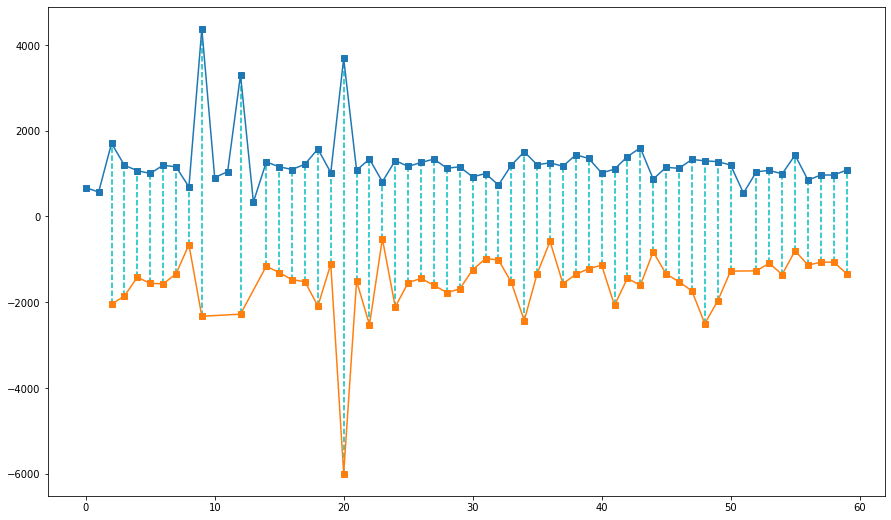

In [37]:
plt.plot(POS_MEAN_INCOME_PER_SHOP.index, POS_MEAN_INCOME_PER_SHOP, marker = 's')
plt.plot(NEG_MEAN_INCOME_PER_SHOP.index, NEG_MEAN_INCOME_PER_SHOP, marker = 's')
plt.vlines(NEG_MEAN_INCOME_PER_SHOP.index, ymin = NEG_MEAN_INCOME_PER_SHOP,
           ymax = POS_MEAN_INCOME_PER_SHOP[NEG_MEAN_INCOME_PER_SHOP.index], color = 'c', linestyle = '--')

plt.show()

In [38]:
shops.loc[20]

shop_name    Москва "Распродажа"
Name: 20, dtype: object

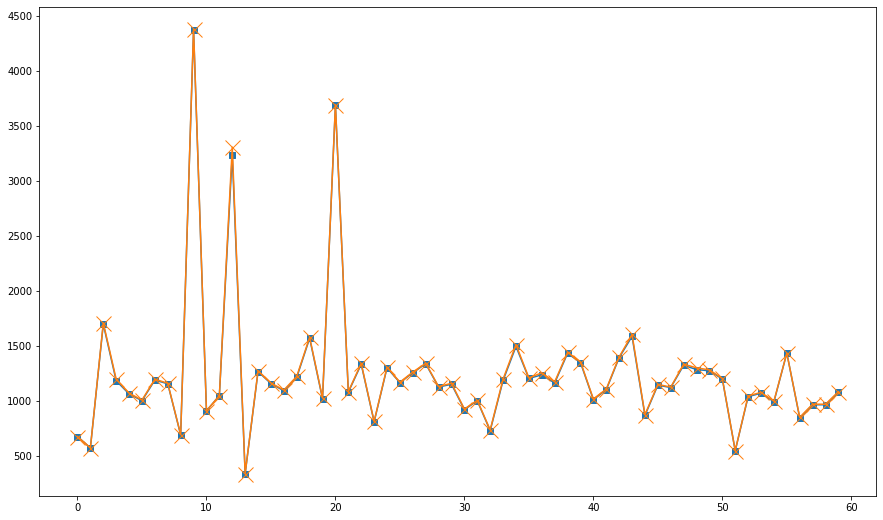

In [39]:
plt.plot(MEAN_INCOME_PER_SHOP.index, MEAN_INCOME_PER_SHOP, marker = 's')
plt.plot(POS_MEAN_INCOME_PER_SHOP.index, POS_MEAN_INCOME_PER_SHOP, marker = 'x', markersize = 15)

In [40]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat
0,2013-01-01,0,19,18976,399.0,1.0,399.0,40
1,2013-01-01,0,19,18284,199.0,1.0,199.0,55
2,2013-01-01,0,19,18320,199.0,1.0,199.0,55
3,2013-01-01,0,19,18329,299.0,1.0,299.0,55
4,2013-01-01,0,19,19367,399.0,1.0,399.0,62
...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,25,7087,699.0,1.0,699.0,30
2935845,2015-10-31,33,25,7172,1499.0,1.0,1499.0,20
2935846,2015-10-31,33,25,7202,199.0,1.0,199.0,30
2935847,2015-10-31,33,25,7780,198.0,1.0,198.0,30


In [41]:
items.loc[2]

item_name           ***В ЛУЧАХ СЛАВЫ   (UNV)                    D
item_category_id                                               40
Name: 2, dtype: object

In [42]:
itemcat.loc[40]

item_category_name    Кино - DVD
Name: 40, dtype: object

sns.barplot(items.index, items['item_category_id'])

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_block_num', ylabel='count'>

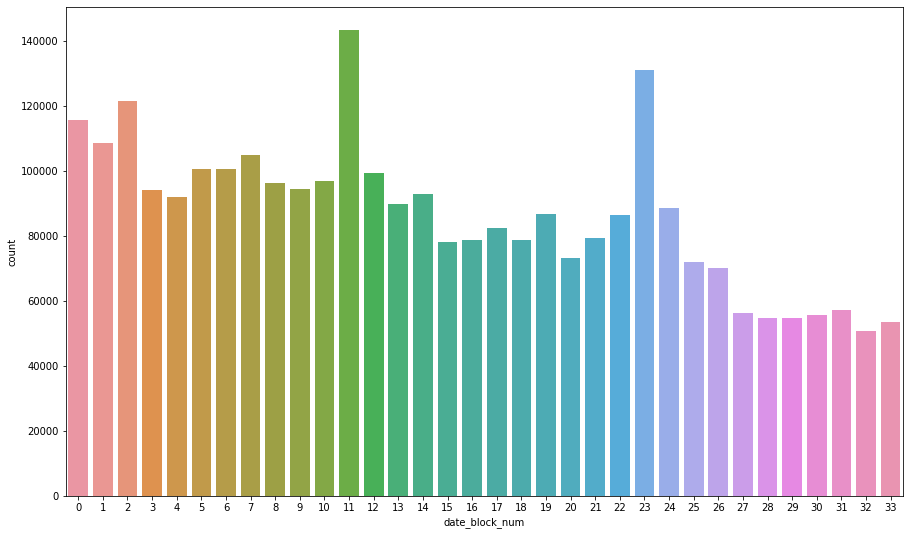

In [43]:
sns.countplot(sales['date_block_num'])

<AxesSubplot:>

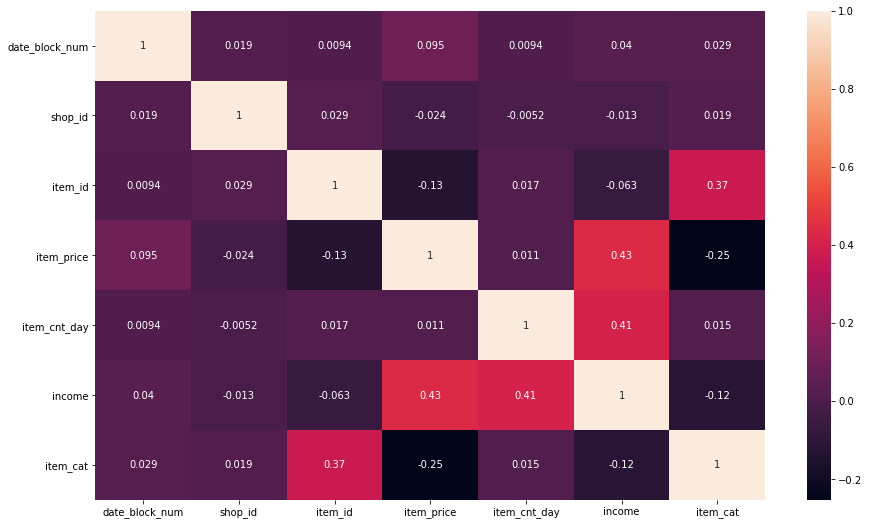

In [44]:
sns.heatmap(sales.corr(), annot = True)

In [45]:
ss = set(shops['shop_name'])

In [46]:
ss

{'!Якутск Орджоникидзе, 56 фран',
 '!Якутск ТЦ "Центральный" фран',
 'Адыгея ТЦ "Мега"',
 'Балашиха ТРК "Октябрь-Киномир"',
 'Волжский ТЦ "Волга Молл"',
 'Вологда ТРЦ "Мармелад"',
 'Воронеж (Плехановская, 13)',
 'Воронеж ТРЦ "Максимир"',
 'Воронеж ТРЦ Сити-Парк "Град"',
 'Выездная Торговля',
 'Жуковский ул. Чкалова 39м?',
 'Жуковский ул. Чкалова 39м²',
 'Интернет-магазин ЧС',
 'Казань ТЦ "Бехетле"',
 'Казань ТЦ "ПаркХаус" II',
 'Калуга ТРЦ "XXI век"',
 'Коломна ТЦ "Рио"',
 'Красноярск ТЦ "Взлетка Плаза"',
 'Красноярск ТЦ "Июнь"',
 'Курск ТЦ "Пушкинский"',
 'Москва "Распродажа"',
 'Москва МТРЦ "Афи Молл"',
 'Москва Магазин С21',
 'Москва ТК "Буденовский" (пав.А2)',
 'Москва ТК "Буденовский" (пав.К7)',
 'Москва ТРК "Атриум"',
 'Москва ТЦ "Ареал" (Беляево)',
 'Москва ТЦ "МЕГА Белая Дача II"',
 'Москва ТЦ "МЕГА Теплый Стан" II',
 'Москва ТЦ "Новый век" (Новокосино)',
 'Москва ТЦ "Перловский"',
 'Москва ТЦ "Семеновский"',
 'Москва ТЦ "Серебряный Дом"',
 'Мытищи ТРК "XL-3"',
 'Н.Новгород ТРЦ

sss = set(map(lambda x : x.split(' ')[0],ss))
city_dict = {b : a for a, b in enumerate(sss)}
city_dict
city = pd.Series(data = city_dict.keys(), index = city_dict.values(), name = 'city')
city
#city.to_csv('city.csv', index = None)
city_dict

In [47]:
city = pd.Series(data = pd.read_csv('city.csv')['city'])
city

0               Москва
1                Курск
2            Ярославль
3               Самара
4               Якутск
5              Сергиев
6             Балашиха
7              Воронеж
8               Мытищи
9               Сургут
10               Чехов
11                 Уфа
12                Омск
13          Н.Новгород
14            Цифровой
15             Вологда
16          Красноярск
17              Адыгея
18            Волжский
19               Томск
20         Новосибирск
21             Коломна
22              Тюмень
23               Химки
24           Жуковский
25              Калуга
26    Интернет-магазин
27              Казань
28        РостовНаДону
29            Выездная
30                 СПб
Name: city, dtype: object

In [48]:
city_dict = {name : index for name,index in zip(city, city.index)}
city_dict

{'Москва': 0,
 'Курск': 1,
 'Ярославль': 2,
 'Самара': 3,
 'Якутск': 4,
 'Сергиев': 5,
 'Балашиха': 6,
 'Воронеж': 7,
 'Мытищи': 8,
 'Сургут': 9,
 'Чехов': 10,
 'Уфа': 11,
 'Омск': 12,
 'Н.Новгород': 13,
 'Цифровой': 14,
 'Вологда': 15,
 'Красноярск': 16,
 'Адыгея': 17,
 'Волжский': 18,
 'Томск': 19,
 'Новосибирск': 20,
 'Коломна': 21,
 'Тюмень': 22,
 'Химки': 23,
 'Жуковский': 24,
 'Калуга': 25,
 'Интернет-магазин': 26,
 'Казань': 27,
 'РостовНаДону': 28,
 'Выездная': 29,
 'СПб': 30}

In [49]:
for index in range(len(shops)):
    if '!Якутск' in shops.loc[index,'shop_name']:
        print(True)
        shops.loc[index,'shop_name'] = shops.loc[index,'shop_name'].replace('!Якутск', 'Якутск')

True
True


In [50]:
for index in range(len(shops)):
    if '!Якутск' in shops.loc[index]:
        print(shops.loc[index])

In [51]:
shops['city_id'] = shops['shop_name'].apply(lambda x : city_dict[x.split(' ')[0]])
shops

,shop_name,city_id
shop_id,,
0,"Якутск Орджоникидзе, 56 фран",4
1,"Якутск ТЦ ""Центральный"" фран",4
2,"Адыгея ТЦ ""Мега""",17
3,"Балашиха ТРК ""Октябрь-Киномир""",6
4,"Волжский ТЦ ""Волга Молл""",18
5,"Вологда ТРЦ ""Мармелад""",15
6,"Воронеж (Плехановская, 13)",7
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",7


In [52]:
sales['city_id'] = list(map(lambda x : shops.loc[x,'city_id'], sales['shop_id']))

In [53]:
sales[sales['shop_id'] == 55]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat,city_id
442719,2013-05-01,4,55,17606,50.00,1.0,50.00,31,14
442720,2013-05-01,4,55,19382,208.00,1.0,208.00,31,14
442796,2013-05-01,4,55,4770,399.00,1.0,399.00,31,14
442797,2013-05-01,4,55,4775,599.00,1.0,599.00,31,14
442798,2013-05-01,4,55,4767,195.99,1.0,195.99,31,14
...,...,...,...,...,...,...,...,...,...
2934479,2015-10-31,33,55,1794,419.00,1.0,419.00,31,14
2934480,2015-10-31,33,55,1929,75.00,11.0,825.00,31,14
2934481,2015-10-31,33,55,2378,499.00,1.0,499.00,31,14
2934482,2015-10-31,33,55,2403,199.00,20.0,3980.00,31,14


In [54]:
temp = sales.groupby('city_id')['income'].mean()

<AxesSubplot:xlabel='city_id', ylabel='income'>

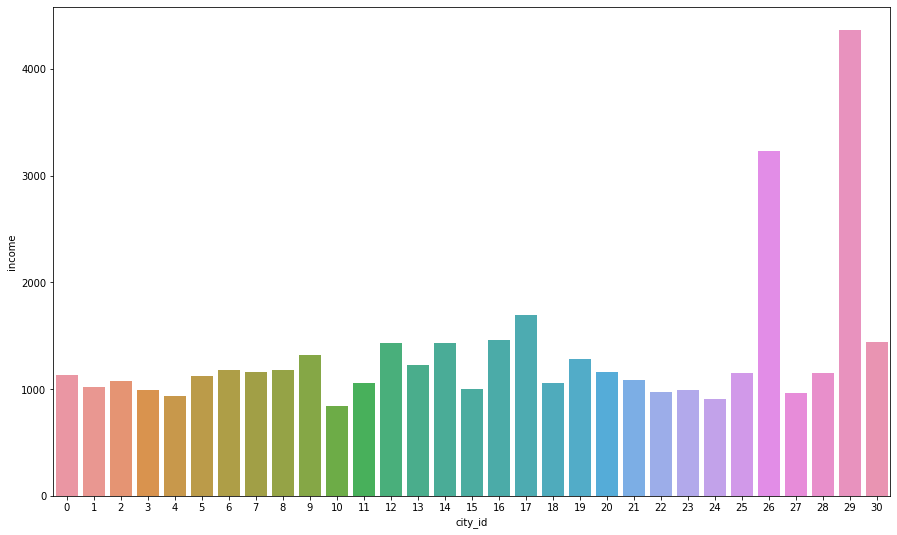

In [55]:
sns.barplot(x = temp.index, y = temp)

In [56]:
print(city.loc[5],'\n'+city.loc[9])

Сергиев 
Сургут


In [57]:
city.loc[26]

'Интернет-магазин'

<AxesSubplot:xlabel='city_id', ylabel='item_cnt_day'>

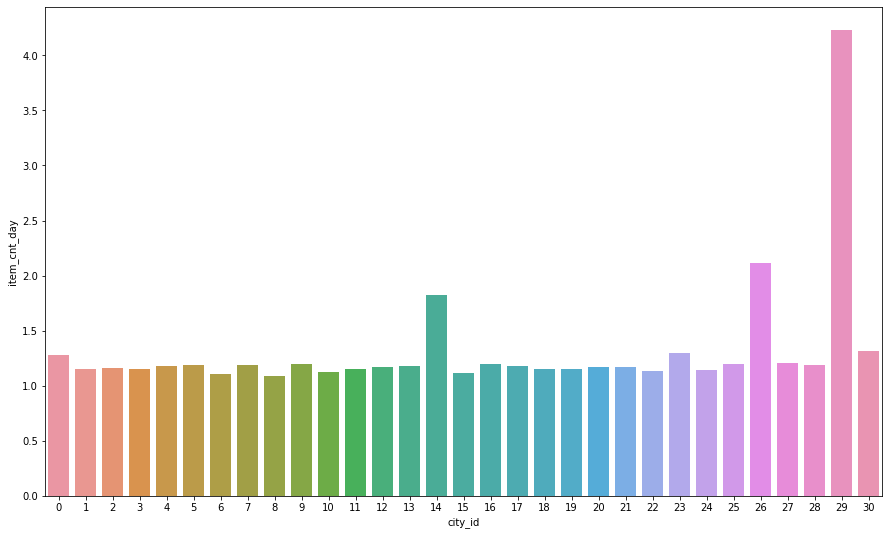

In [58]:
temp = sales.groupby('city_id')['item_cnt_day'].mean()
sns.barplot(x = temp.index, y = temp)

In [59]:
city.loc[[1,5,9]]

1      Курск
5    Сергиев
9     Сургут
Name: city, dtype: object

<AxesSubplot:xlabel='city_id', ylabel='income'>

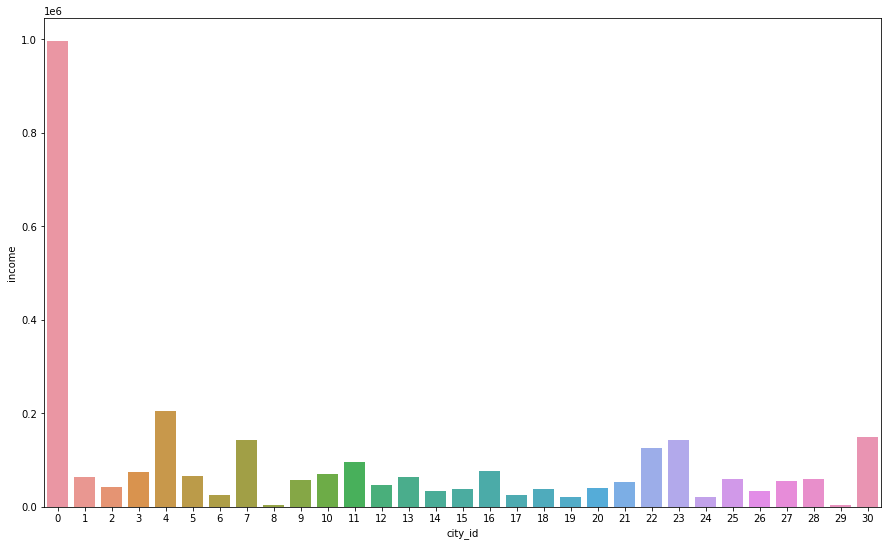

In [60]:
temp = sales.groupby('city_id')['income'].count()
sns.barplot(x = temp.index, y = temp)

In [61]:
city.loc[25]

'Калуга'

In [62]:
city[[5,20,28,30]]

5          Сергиев
20     Новосибирск
28    РостовНаДону
30             СПб
Name: city, dtype: object

In [63]:
temp = np.argpartition(sales[sales['shop_id'] == 55]['income'], -1)[-1:]
temp

2934483    33370
Name: income, dtype: int64

In [64]:
sales[sales['shop_id'] == 55].iloc[33370]

date              2015-09-30 00:00:00
date_block_num                     32
shop_id                            55
item_id                          9249
item_price                1702.825746
item_cnt_day                    637.0
income                 1084699.999998
item_cat                            8
city_id                            14
Name: 2881516, dtype: object

In [65]:
items.loc[9249]

item_name           Билет "ИгроМир 2015" - 3 октября 2015 (сайт) У...
item_category_id                                                    8
Name: 9249, dtype: object

<AxesSubplot:>

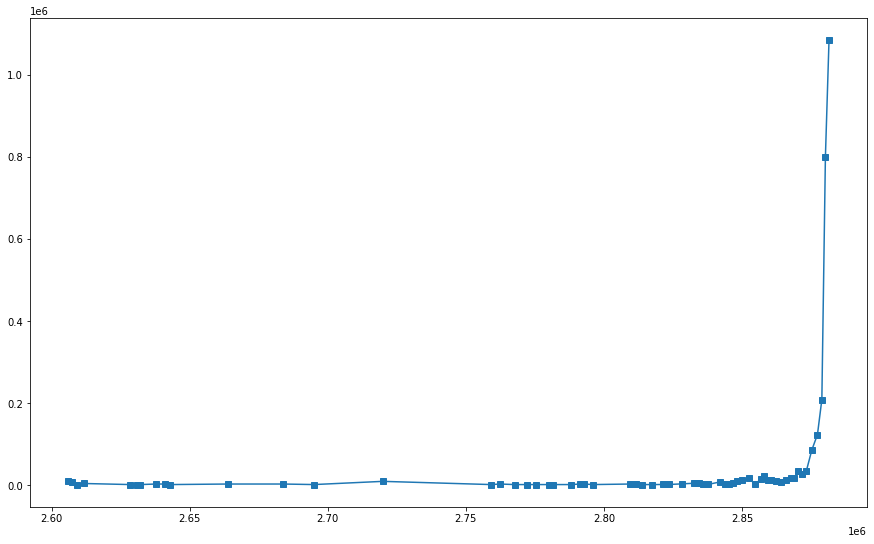

In [66]:
sales[sales['item_id'] == 9249]['income'].plot(marker = 's')

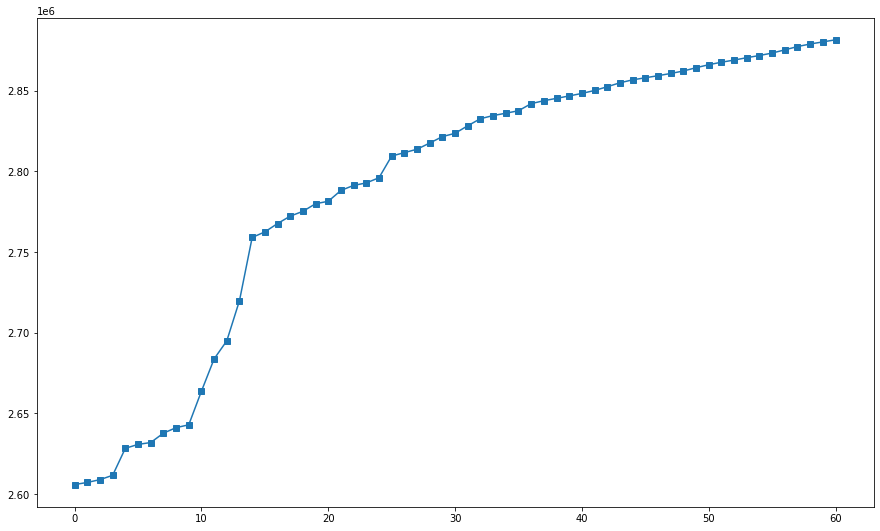

In [67]:
plt.plot(np.arange(len(sales[sales['item_id'] == 9249].index)),sales[sales['item_id'] == 9249].index, marker = 's')

In [68]:
sales[sales['item_id'] == 2404]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat,city_id
605971,2013-06-22,5,55,2404,299.0,1.0,299.0,31,14
1134726,2013-12-04,11,55,2404,299.0,1.0,299.0,31,14
1300116,2014-01-08,12,55,2404,75.0,1.0,75.0,31,14
1303589,2014-01-09,12,55,2404,75.0,1.0,75.0,31,14
1465455,2014-03-03,14,55,2404,299.0,1.0,299.0,31,14
2082453,2014-10-21,21,55,2404,299.0,1.0,299.0,31,14
2545809,2015-03-28,26,55,2404,75.0,1.0,75.0,31,14
2932150,2015-10-30,33,55,2404,149.0,6.0,894.0,31,14
2934483,2015-10-31,33,55,2404,149.0,20.0,2980.0,31,14


In [69]:
items.iloc[2404]

item_name           Company of Heroes: Opposing Fronts [PC, Цифров...
item_category_id                                                   31
Name: 2404, dtype: object

In [70]:
sales[sales['shop_id'] == 55].groupby('item_id')['item_cnt_day'].count()

item_id
1          6
58         1
69        78
101        7
102        2
        ... 
21995     18
22078     15
22080      1
22165      2
22166    270
Name: item_cnt_day, Length: 1985, dtype: int64

In [71]:
city

0               Москва
1                Курск
2            Ярославль
3               Самара
4               Якутск
5              Сергиев
6             Балашиха
7              Воронеж
8               Мытищи
9               Сургут
10               Чехов
11                 Уфа
12                Омск
13          Н.Новгород
14            Цифровой
15             Вологда
16          Красноярск
17              Адыгея
18            Волжский
19               Томск
20         Новосибирск
21             Коломна
22              Тюмень
23               Химки
24           Жуковский
25              Калуга
26    Интернет-магазин
27              Казань
28        РостовНаДону
29            Выездная
30                 СПб
Name: city, dtype: object

<AxesSubplot:xlabel='item_cat', ylabel='item_cat'>

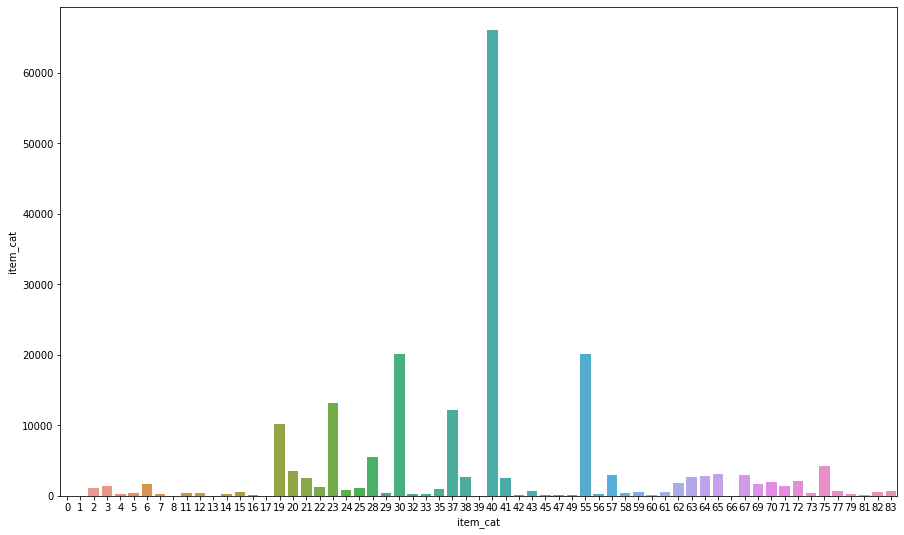

In [72]:
temp = sales.groupby(['city_id', 'item_cat'])['item_cat'].count()

temp = temp.loc[4]

sns.barplot(x = temp.index, y = temp)

### Спб
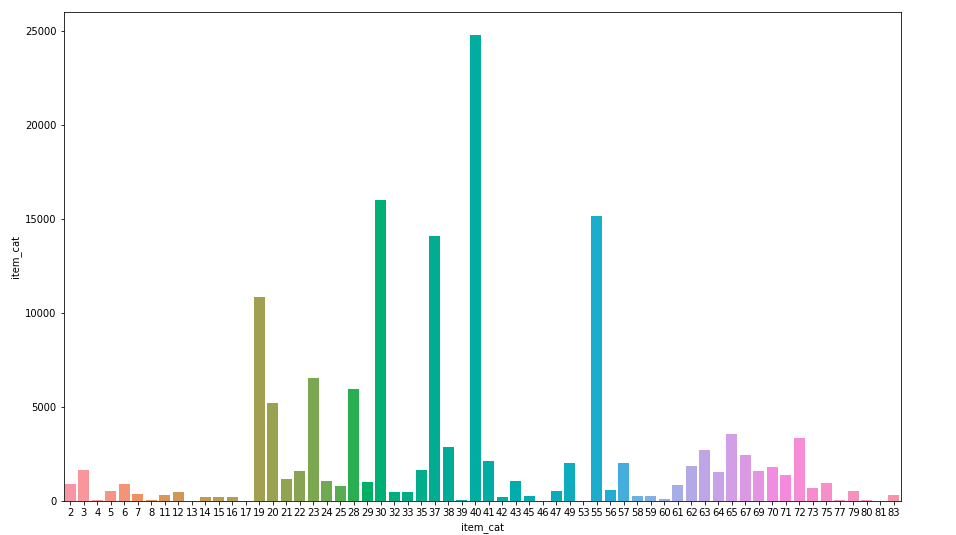

### Москва
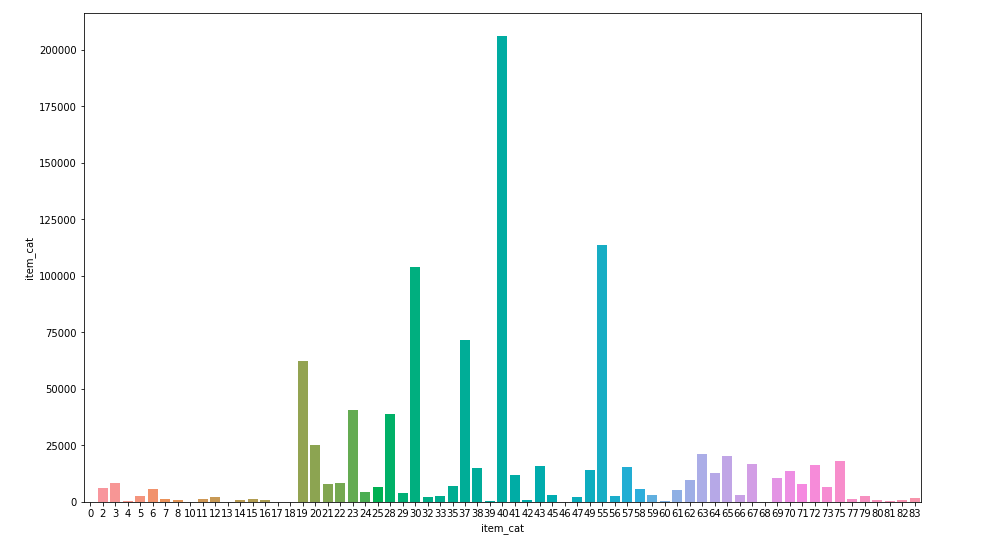

### Мытищи
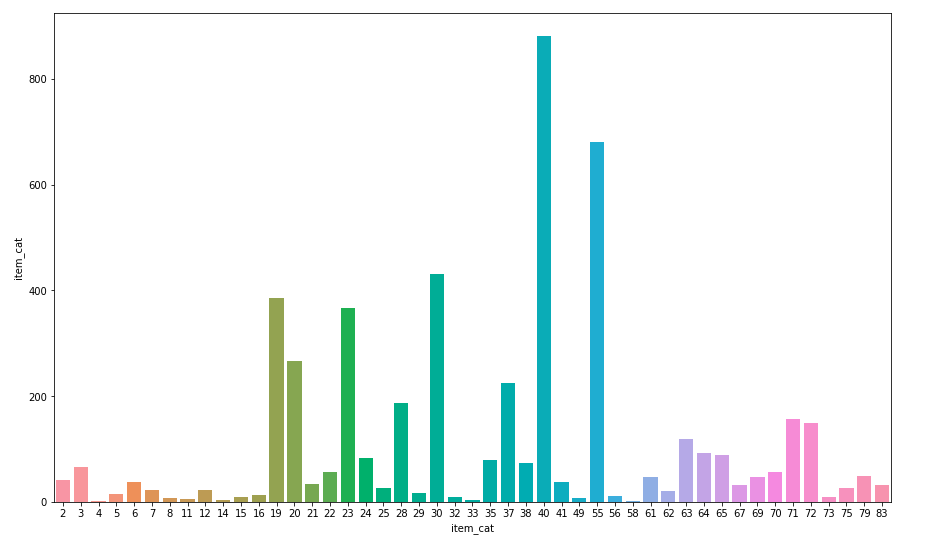

### Химки
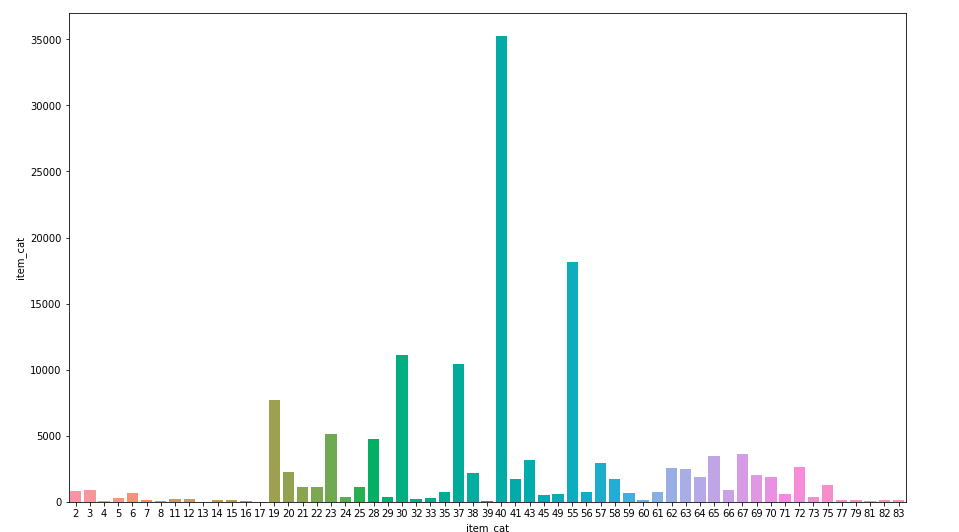

In [73]:
itemcat.loc[40]

item_category_name    Кино - DVD
Name: 40, dtype: object

In [74]:
sales['day'] = sales['date'].apply(lambda x : x.day)

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='income'>

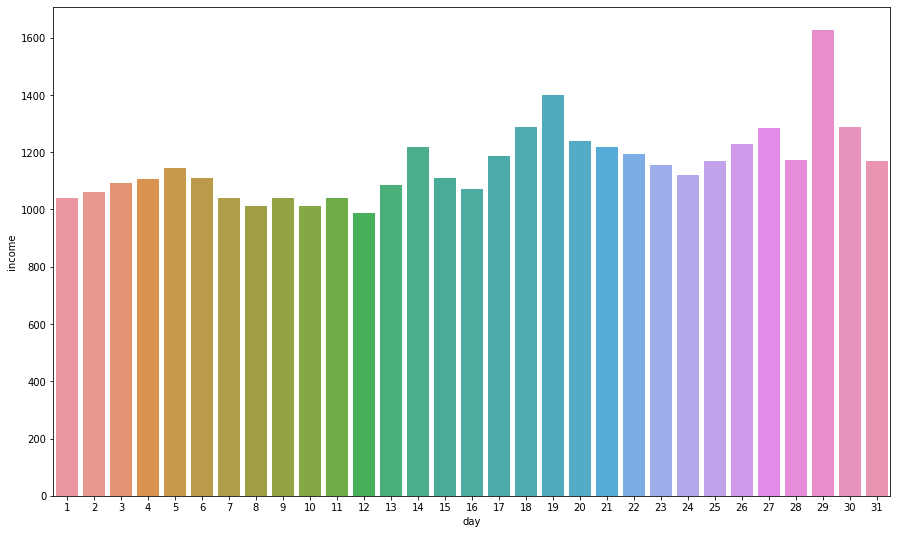

In [75]:
temp = sales.groupby('day')['income'].mean()
sns.barplot(temp.index, temp)

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='item_cnt_day'>

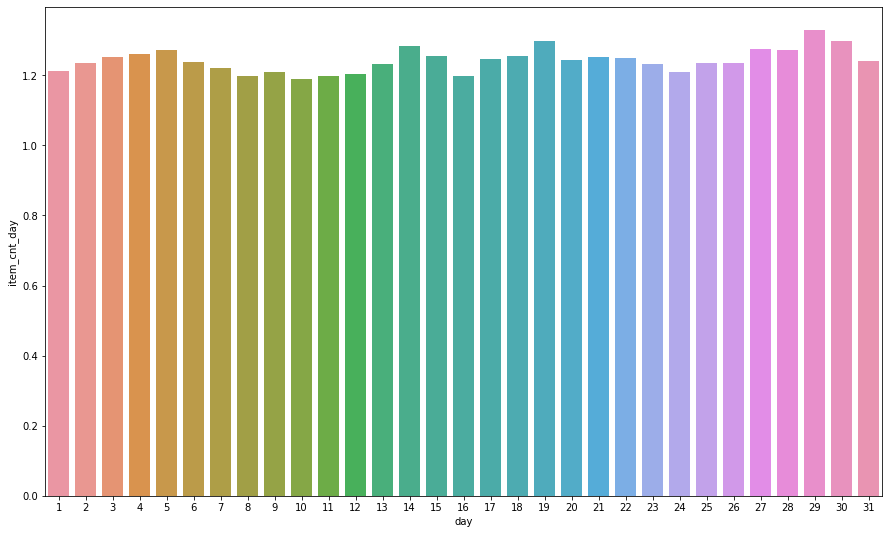

In [76]:
temp = sales.groupby('day')['item_cnt_day'].mean()
sns.barplot(temp.index, temp)

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='income'>

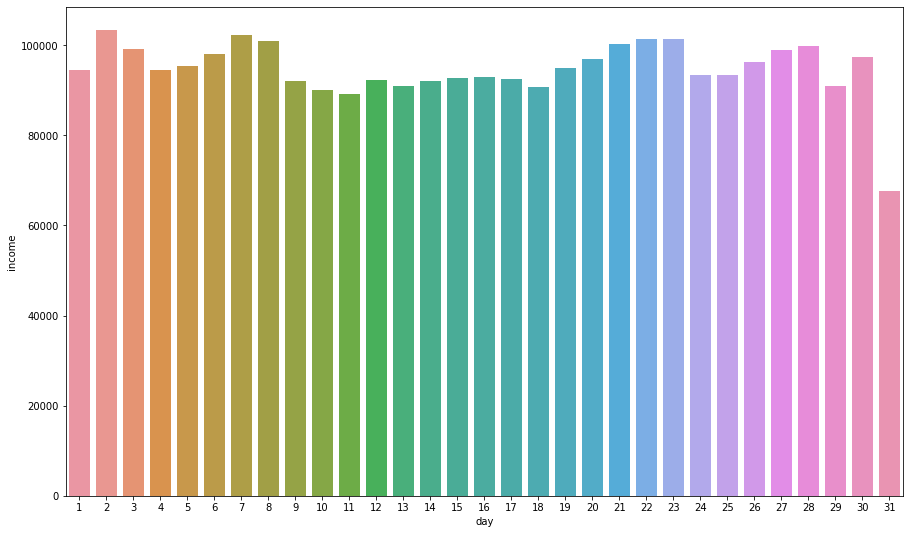

In [77]:
temp = sales.groupby('day')['income'].count()
sns.barplot(temp.index, temp)

In [78]:
sales['weekday'] = sales['date'].apply(lambda x : x.weekday())

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='income'>

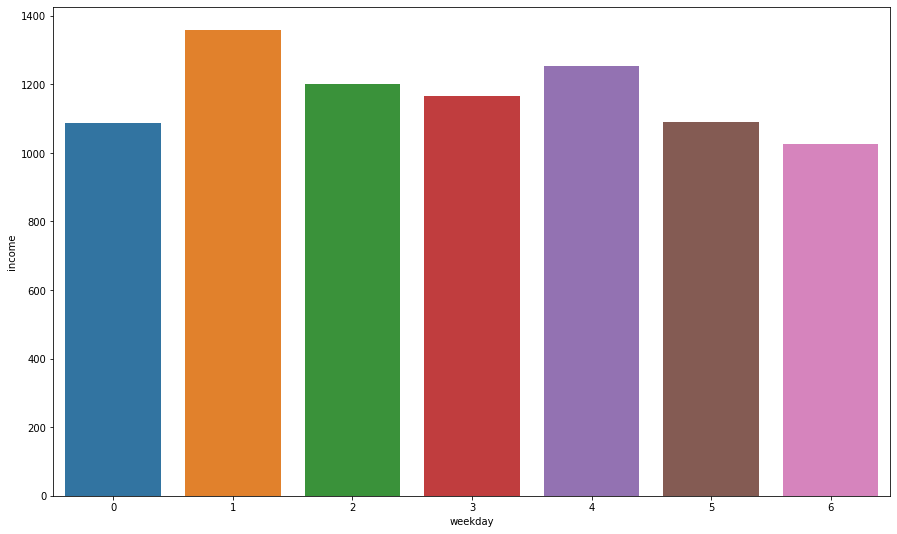

In [79]:
temp = sales.groupby('weekday')['income'].mean()
sns.barplot(temp.index, temp)

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='item_cnt_day'>

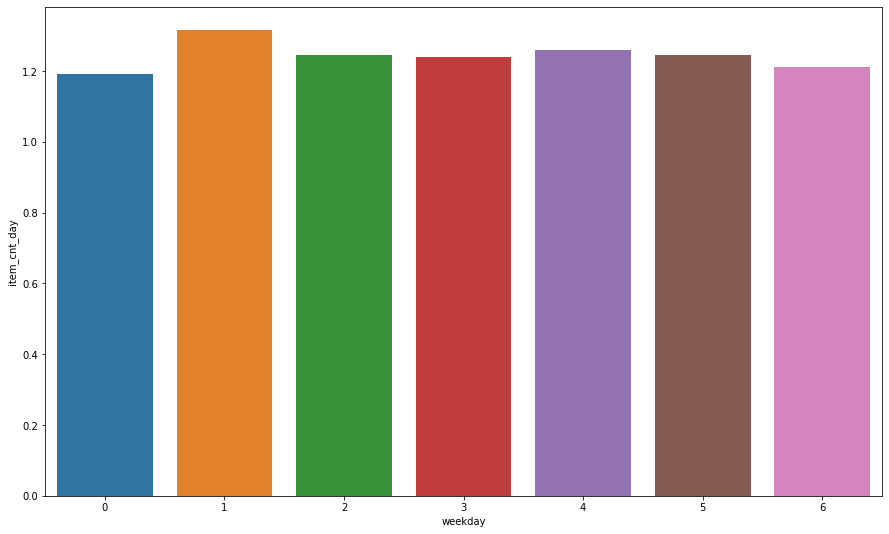

In [80]:
temp = sales.groupby('weekday')['item_cnt_day'].mean()
sns.barplot(temp.index, temp)

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='income'>

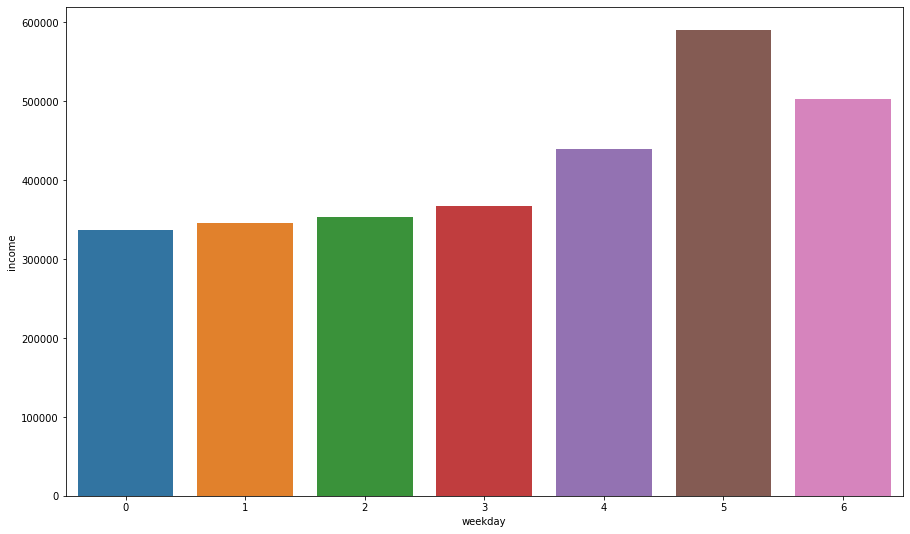

In [81]:
temp = sales.groupby('weekday')['income'].count()
sns.barplot(temp.index, temp)

In [82]:
sales['year'] = sales['date'].apply(lambda x : x.year)
sales['month'] = sales['date'].apply(lambda x : x.month)
sales['week'] = sales['date'].apply(lambda x : x.week)

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


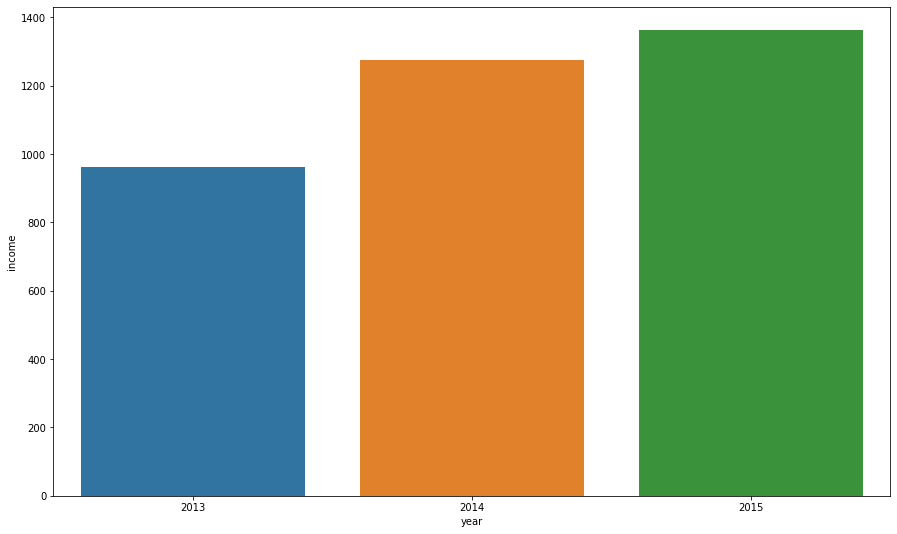

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


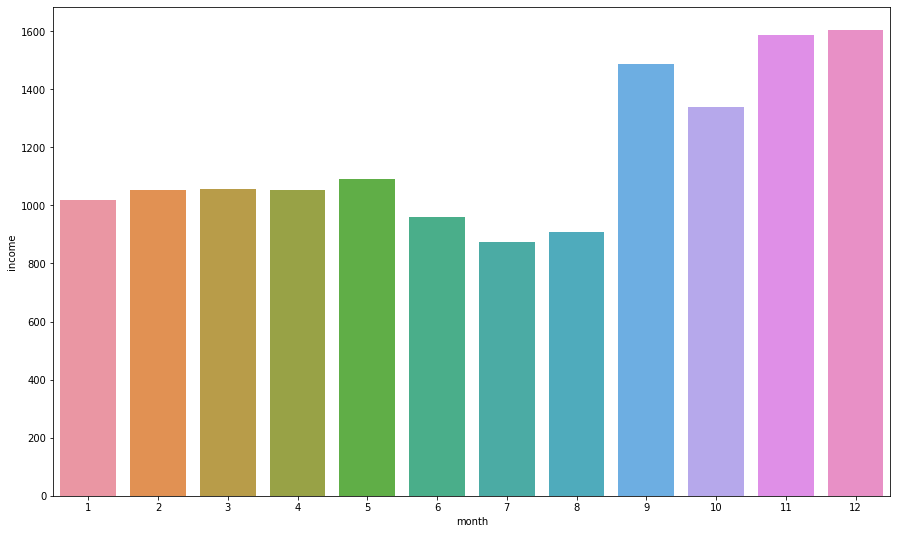

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


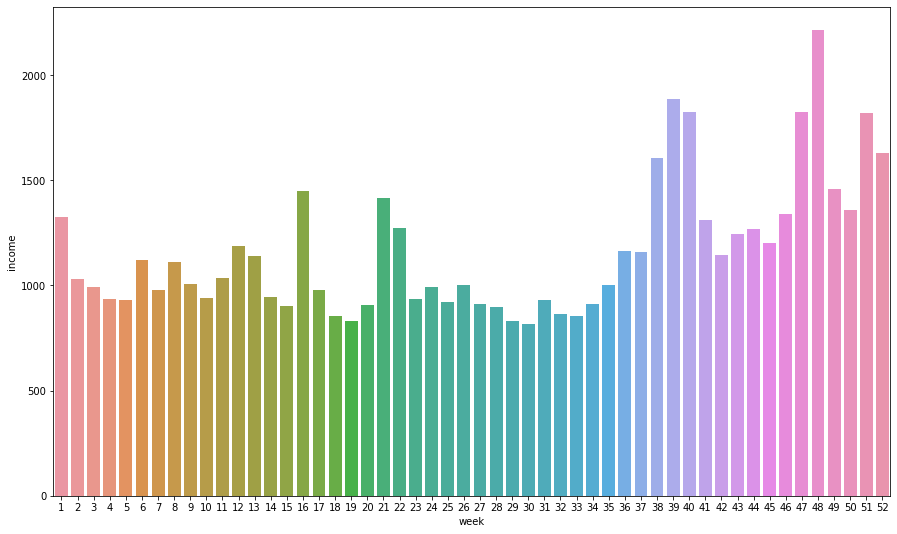

In [83]:
for col in ['year', 'month', 'week']:
    temp = sales.groupby(col)['income'].mean()
    sns.barplot(temp.index, temp)
    plt.show()

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


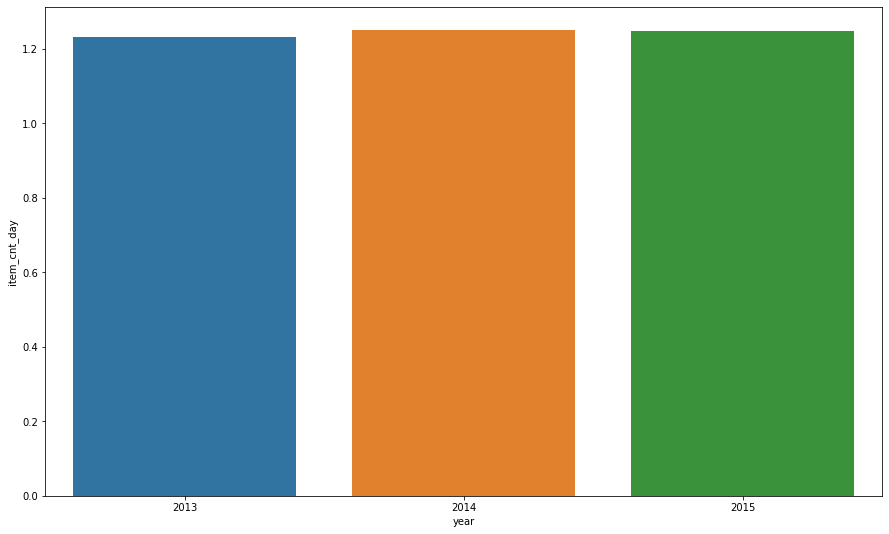

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


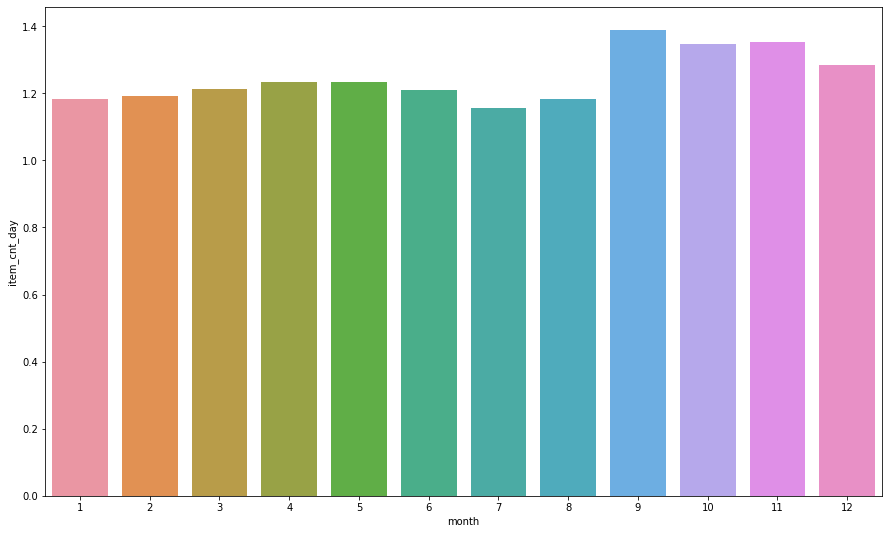

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


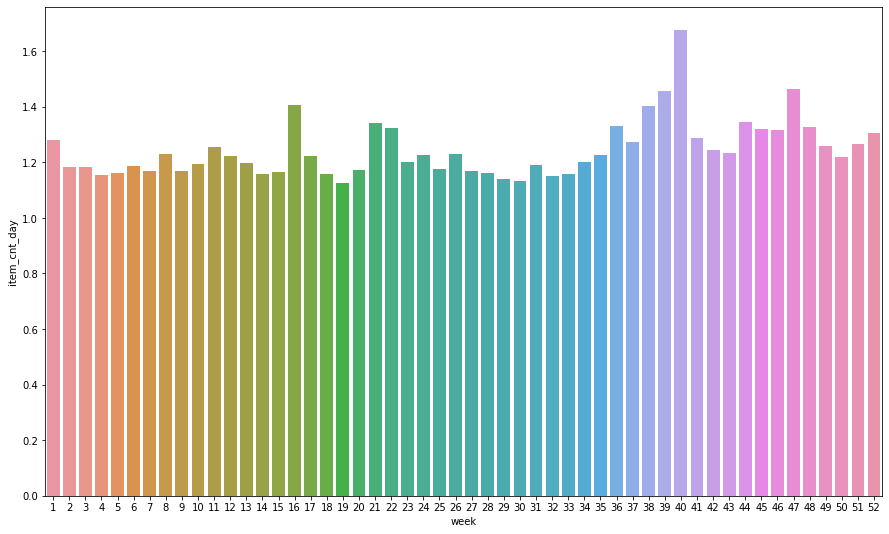

In [84]:
for col in ['year', 'month', 'week']:
    temp = sales.groupby(col)['item_cnt_day'].mean()
    sns.barplot(temp.index, temp)
    plt.show()

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


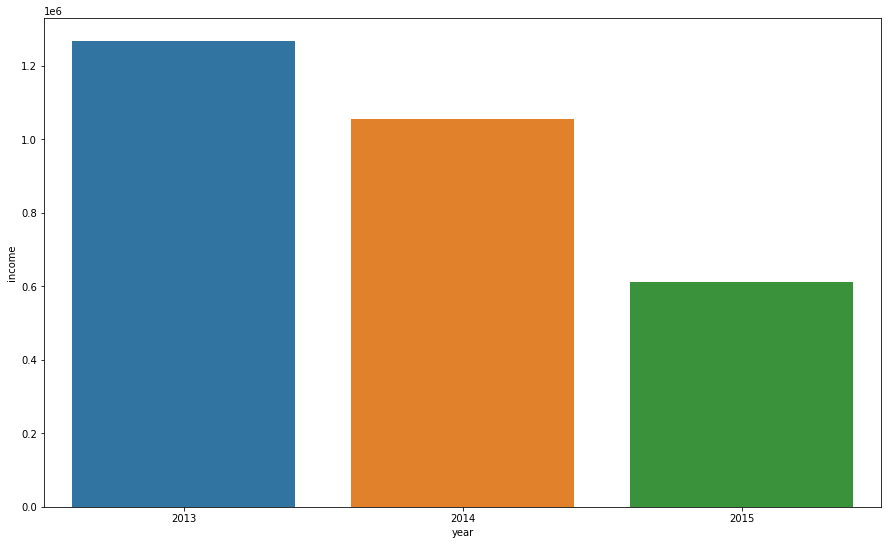

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


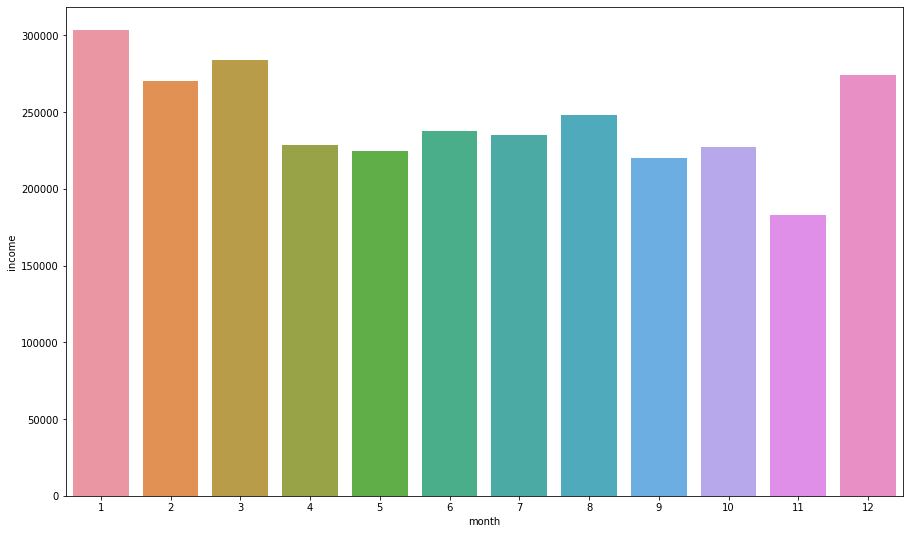

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


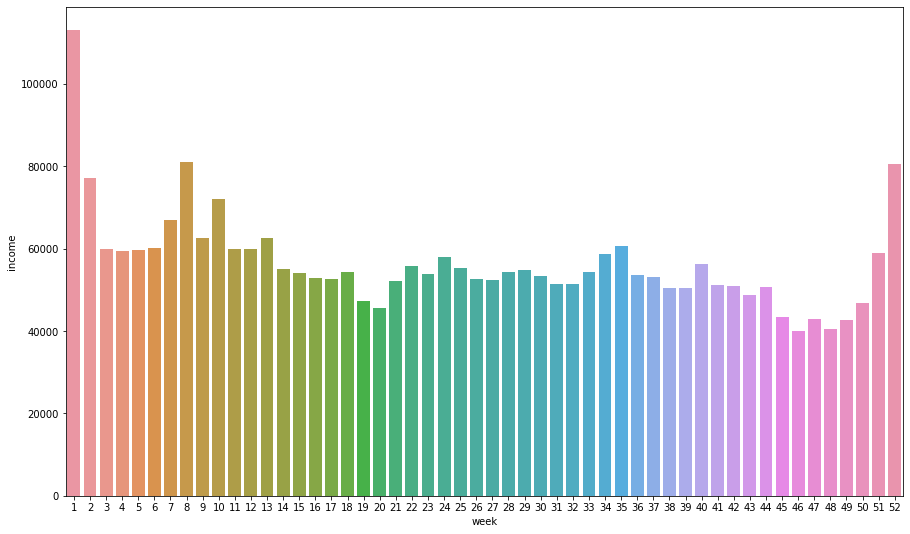

In [85]:
for col in ['year', 'month', 'week']:
    temp = sales.groupby(col)['income'].count()
    sns.barplot(temp.index, temp)
    plt.show()

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


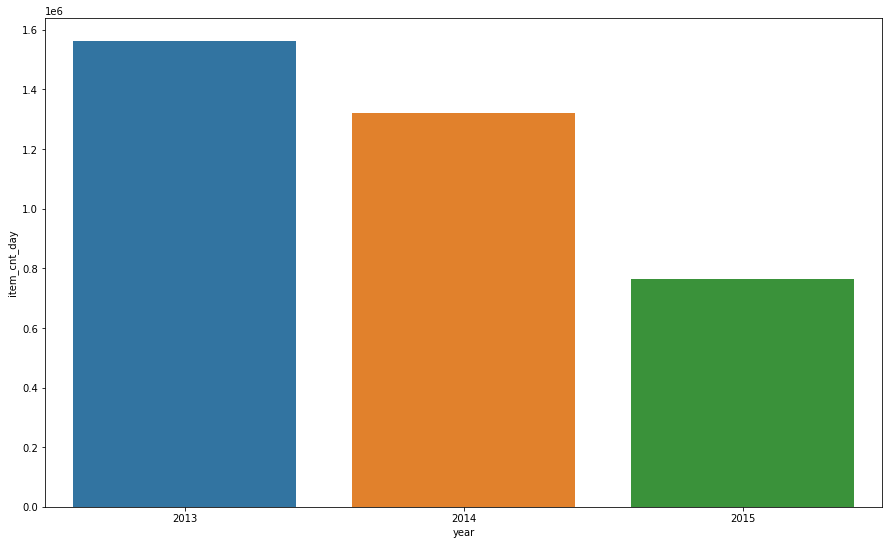

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


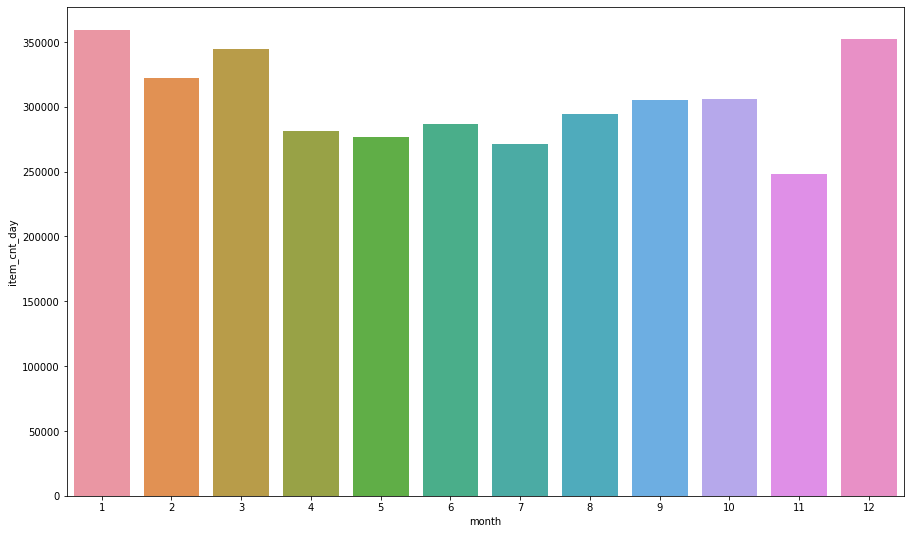

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


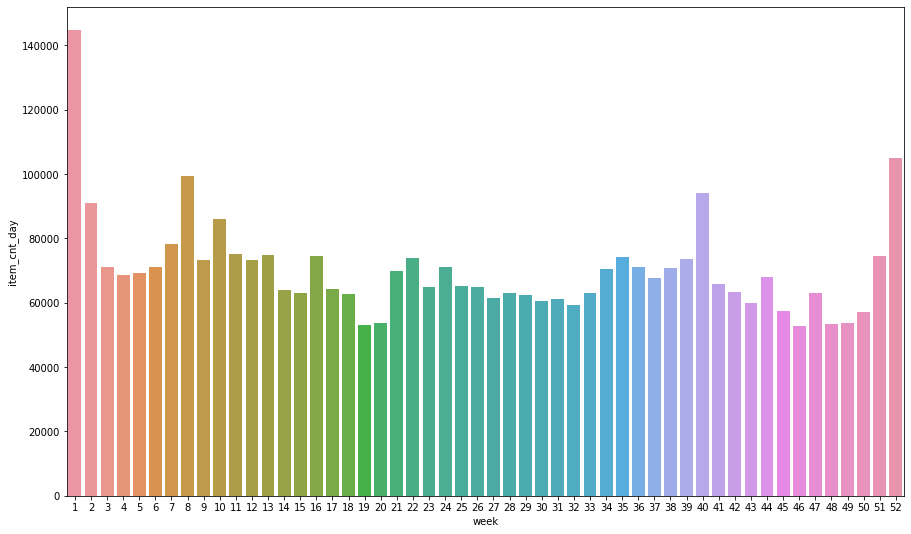

In [86]:
for col in ['year', 'month', 'week']:
    temp = sales.groupby(col)['item_cnt_day'].sum()
    sns.barplot(temp.index, temp)
    plt.show()

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='income'>

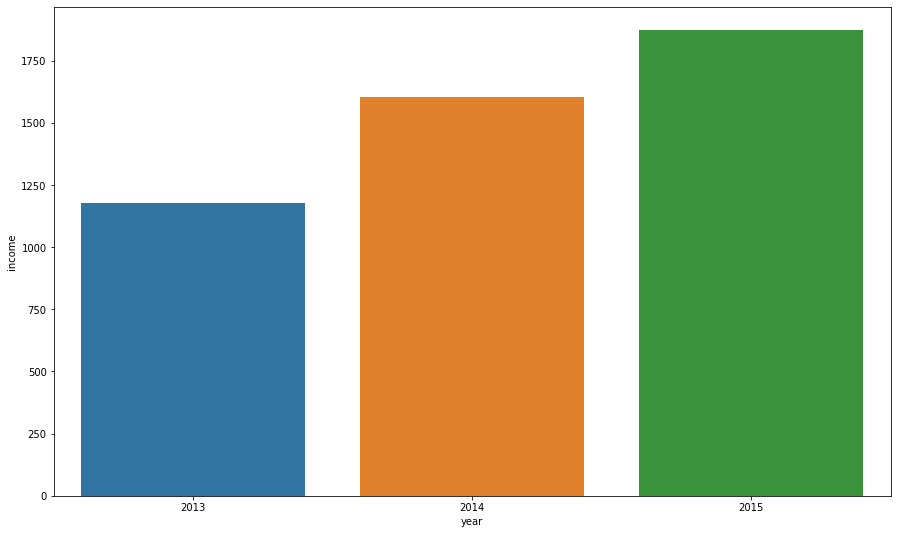

In [87]:
temp = sales[sales['item_cnt_day'] <= 0].groupby('year')['income'].mean()
sns.barplot(temp.index, abs(temp))

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='item_cnt_day'>

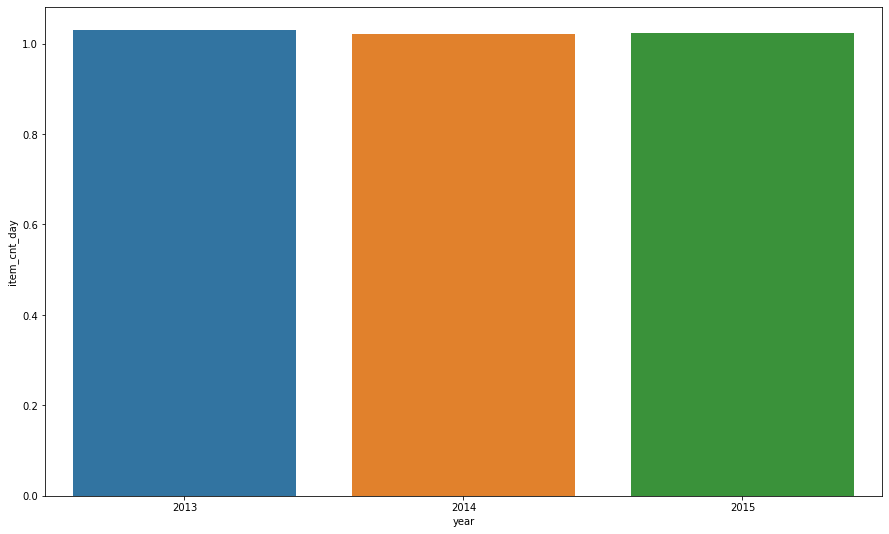

In [88]:
temp = sales[sales['item_cnt_day'] <= 0].groupby('year')['item_cnt_day'].mean()
sns.barplot(temp.index, abs(temp))

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='item_cnt_day'>

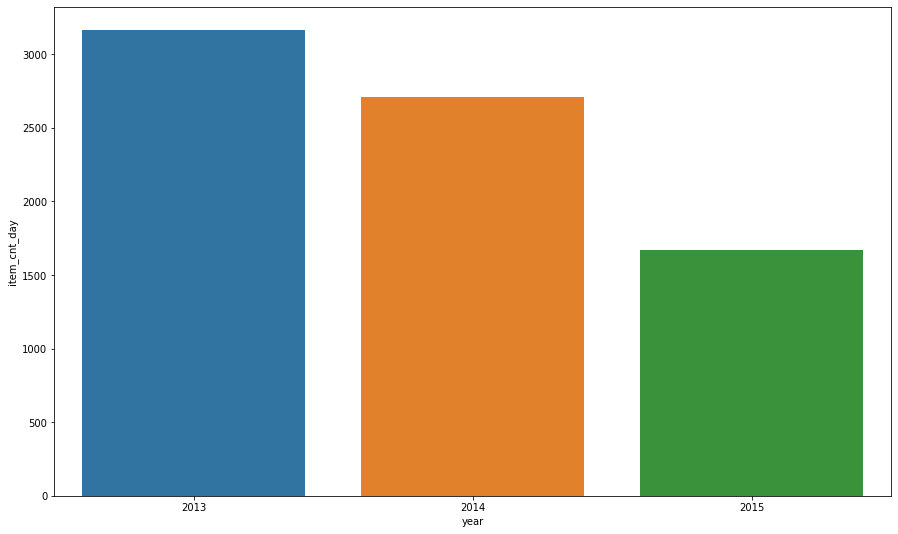

In [89]:
temp = sales[sales['item_cnt_day'] <= 0].groupby('year')['item_cnt_day'].sum()
sns.barplot(temp.index, abs(temp))

In [90]:
itemcat.loc[37]

item_category_name    Кино - Blu-Ray
Name: 37, dtype: object

In [91]:
itemcat.loc[55]

item_category_name    Музыка - CD локального производства
Name: 55, dtype: object

In [92]:
itemcat.loc[39]

item_category_name    Кино - Blu-Ray 4K
Name: 39, dtype: object

In [93]:
itemcat.loc[40]

item_category_name    Кино - DVD
Name: 40, dtype: object

In [94]:
itemcat.loc[30]

item_category_name    Игры PC - Стандартные издания
Name: 30, dtype: object

In [95]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat,city_id,day,weekday,year,month,week
0,2013-01-01,0,19,18976,399.0,1.0,399.0,40,1,1,1,2013,1,1
1,2013-01-01,0,19,18284,199.0,1.0,199.0,55,1,1,1,2013,1,1
2,2013-01-01,0,19,18320,199.0,1.0,199.0,55,1,1,1,2013,1,1
3,2013-01-01,0,19,18329,299.0,1.0,299.0,55,1,1,1,2013,1,1
4,2013-01-01,0,19,19367,399.0,1.0,399.0,62,1,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,25,7087,699.0,1.0,699.0,30,0,31,5,2015,10,44
2935845,2015-10-31,33,25,7172,1499.0,1.0,1499.0,20,0,31,5,2015,10,44
2935846,2015-10-31,33,25,7202,199.0,1.0,199.0,30,0,31,5,2015,10,44
2935847,2015-10-31,33,25,7780,198.0,1.0,198.0,30,0,31,5,2015,10,44


In [96]:
shops

,shop_name,city_id
shop_id,,
0,"Якутск Орджоникидзе, 56 фран",4
1,"Якутск ТЦ ""Центральный"" фран",4
2,"Адыгея ТЦ ""Мега""",17
3,"Балашиха ТРК ""Октябрь-Киномир""",6
4,"Волжский ТЦ ""Волга Молл""",18
5,"Вологда ТРЦ ""Мармелад""",15
6,"Воронеж (Плехановская, 13)",7
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",7


### Жуковский ул. Чкалова 39м?        
### Жуковский ул. Чкалова 39м²

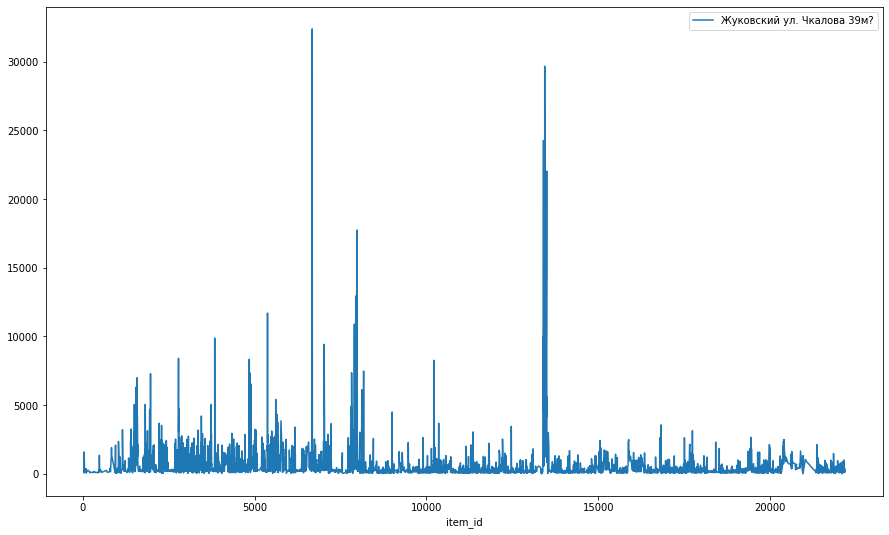

In [97]:
temp = sales.groupby(['shop_id','item_id'])['item_price'].mean()[10].plot(label = 'Жуковский ул. Чкалова 39м?')
plt.legend()

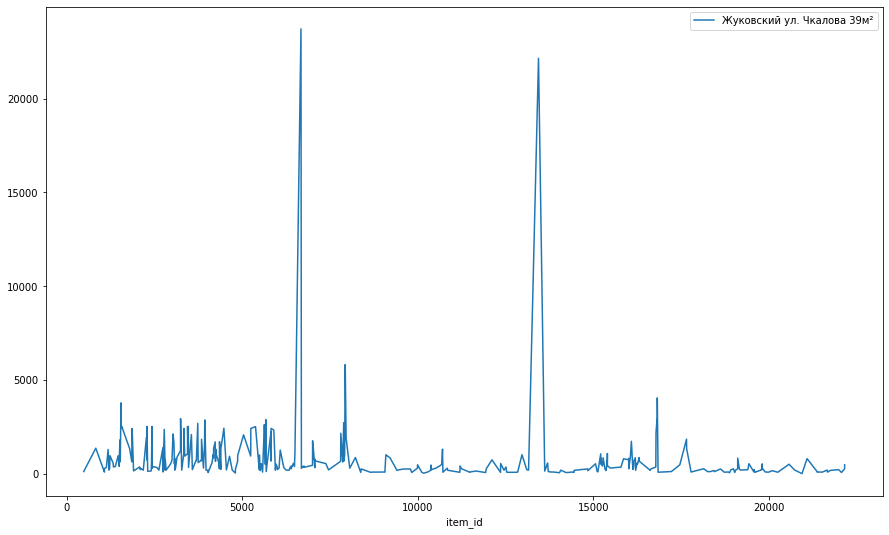

In [98]:
temp = sales.groupby(['shop_id','item_id'])['item_price'].mean()[11].plot(label = 'Жуковский ул. Чкалова 39м²')
plt.legend()

In [99]:
#sales[sales['shop_id'] == 10].join(sales[sales['shop_id'] == 11], on = ['item_cat'])b
pd.merge(sales[sales['shop_id'] == 10], sales[sales['shop_id'] == 11], on = ['item_cat'])

,date_x,date_block_num_x,shop_id_x,item_id_x,item_price_x,item_cnt_day_x,income_x,item_cat,city_id_x,day_x,...,item_id_y,item_price_y,item_cnt_day_y,income_y,city_id_y,day_y,weekday_y,year_y,month_y,week_y
0,2013-01-02,0,10,5895,1709.00,1.0,1709.00,23,24,2,...,3364,942.00,1.0,942.00,24,1,6,2015,2,5
1,2013-01-02,0,10,5895,1709.00,1.0,1709.00,23,24,2,...,2424,2079.00,1.0,2079.00,24,1,6,2015,2,5
2,2013-01-02,0,10,5895,1709.00,1.0,1709.00,23,24,2,...,3343,2072.00,1.0,2072.00,24,3,1,2015,2,6
3,2013-01-02,0,10,5895,1709.00,1.0,1709.00,23,24,2,...,3833,717.00,1.0,717.00,24,4,2,2015,2,6
4,2013-01-02,0,10,5895,1709.00,1.0,1709.00,23,24,2,...,5039,2072.00,1.0,2072.00,24,4,2,2015,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886948,2015-09-03,32,10,7927,2050.78,1.0,2050.78,7,24,3,...,7935,5818.95,1.0,5818.95,24,28,5,2015,2,9
886949,2015-09-10,32,10,8457,262.82,1.0,262.82,7,24,10,...,7935,5818.95,1.0,5818.95,24,28,5,2015,2,9
886950,2015-09-28,32,10,7928,2192.00,1.0,2192.00,7,24,28,...,7935,5818.95,1.0,5818.95,24,28,5,2015,2,9
886951,2015-10-24,33,10,7937,1798.00,1.0,1798.00,7,24,24,...,7935,5818.95,1.0,5818.95,24,28,5,2015,2,9


In [100]:
intersected = itemcat.loc[np.intersect1d(sales[sales['shop_id'] == 10]['item_cat'],sales[sales['shop_id'] == 11]['item_cat'])]

In [101]:
temp = sales.groupby(['shop_id', 'item_cat']).mean().loc[10:11]

In [102]:
temp

date_block_num       item_id   item_price  item_cnt_day  \
shop_id item_cat                                                            
10      2              11.537313   6263.873134  1641.572388      1.029851   
        3              19.193878   7330.816327  1610.115102      1.035714   
        4               5.833333  11864.833333  1243.833333      1.000000   
        5               7.625000   5589.854167   857.015417      1.000000   
        6              14.869565   8093.355072  1484.210725      1.028986   
...                          ...           ...          ...           ...   
11      70             25.000000   9407.500000   184.000000      1.000000   
        71             25.000000  20949.000000     3.000000      2.705882   
        72             25.000000  20656.500000   355.235000      1.000000   
        73             25.000000    600.333333   530.966667      1.000000   
        75             25.000000   3975.500000   962.823500      1.150000   

                       income  city_id        day   weekday         year  \
shop_id item_cat                                                           
10      2         1697.199254     24.0  14.947761  3.485075  2013.507463   
        3         1665.561020     24.0  16.147959  3.102041  2014.091837   
        4         1243.833333     24.0  19.333333  2.500000  2013.333333   
        5          857.015417     24.0  13.958333  2.854167  2013.187500   
        6         1521.138261     24.0  17.072464  3.239130  2013.760870   
...                       ...      ...        ...       ...          ...   
11      70         184.000000     24.0  19.000000  3.000000  2015.000000   
        71           8.117647     24.0  17.294118  2.941176  2015.000000   
        72         355.235000     24.0  26.000000  3.000000  2015.000000   
        73         530.966667     24.0  16.000000  4.666667  2015.000000   
        75        1092.723500     24.0  13.600000  2.850000  2015.000000   

                     month       week  
shop_id item_cat                       
10      2         6.447761  25.514925  
        3         7.091837  28.586735  
        4         2.833333  11.333333  
        5         6.375000  25.875000  
        6         6.739130  25.275362  
...                    ...        ...  
11      70        2.000000   8.000000  
        71        2.000000   7.764706  
        72        2.000000   9.000000  
        73        2.000000   7.333333  
        75        2.000000   7.250000  

[92 rows x 11 columns]

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cat', ylabel='item_cnt_day'>

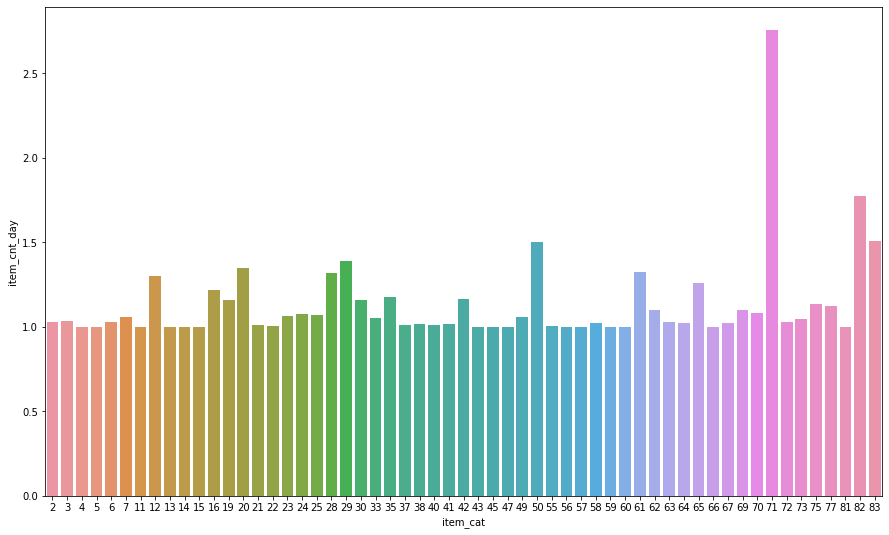

In [103]:
sns.barplot(temp.loc[10].index, temp.loc[10,'item_cnt_day'])

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cat', ylabel='income'>

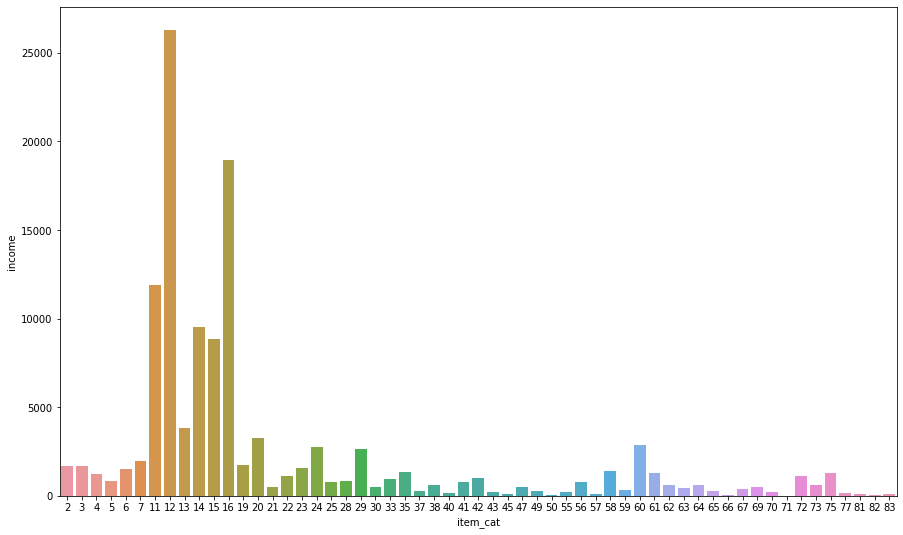

In [104]:
sns.barplot(temp.loc[10].index, temp.loc[10,'income'])

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cat', ylabel='item_cnt_day'>

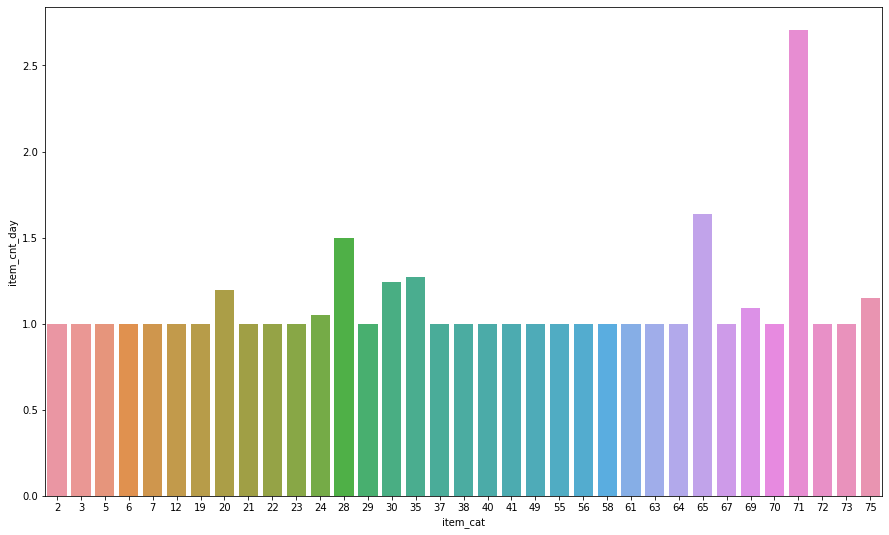

In [105]:
sns.barplot(temp.loc[11].index, temp.loc[11,'item_cnt_day'])

/home/alexey/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cat', ylabel='income'>

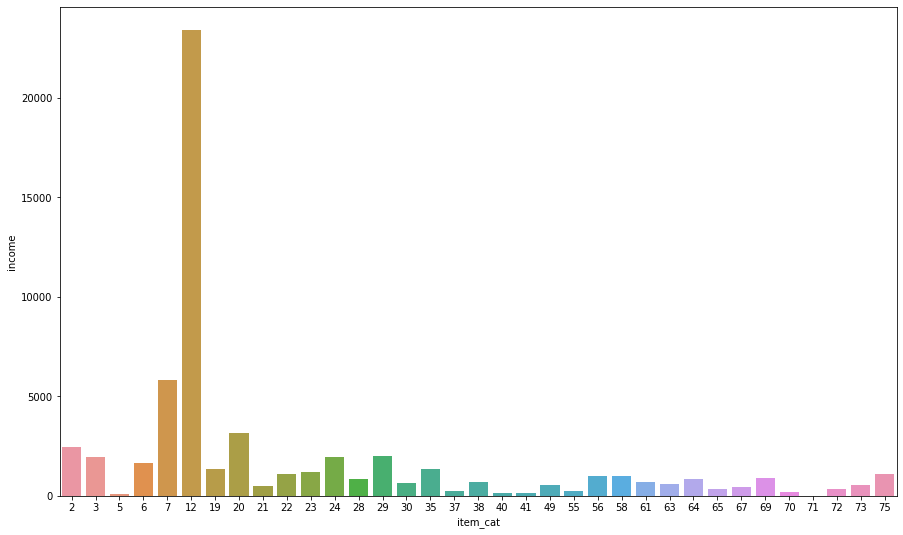

In [106]:
sns.barplot(temp.loc[11].index, temp.loc[11,'income'])

In [107]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,income,item_cat,city_id,day,weekday,year,month,week
0,2013-01-01,0,19,18976,399.0,1.0,399.0,40,1,1,1,2013,1,1
1,2013-01-01,0,19,18284,199.0,1.0,199.0,55,1,1,1,2013,1,1
2,2013-01-01,0,19,18320,199.0,1.0,199.0,55,1,1,1,2013,1,1
3,2013-01-01,0,19,18329,299.0,1.0,299.0,55,1,1,1,2013,1,1
4,2013-01-01,0,19,19367,399.0,1.0,399.0,62,1,1,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-31,33,25,7087,699.0,1.0,699.0,30,0,31,5,2015,10,44
2935845,2015-10-31,33,25,7172,1499.0,1.0,1499.0,20,0,31,5,2015,10,44
2935846,2015-10-31,33,25,7202,199.0,1.0,199.0,30,0,31,5,2015,10,44
2935847,2015-10-31,33,25,7780,198.0,1.0,198.0,30,0,31,5,2015,10,44


In [108]:
city

0               Москва
1                Курск
2            Ярославль
3               Самара
4               Якутск
5              Сергиев
6             Балашиха
7              Воронеж
8               Мытищи
9               Сургут
10               Чехов
11                 Уфа
12                Омск
13          Н.Новгород
14            Цифровой
15             Вологда
16          Красноярск
17              Адыгея
18            Волжский
19               Томск
20         Новосибирск
21             Коломна
22              Тюмень
23               Химки
24           Жуковский
25              Калуга
26    Интернет-магазин
27              Казань
28        РостовНаДону
29            Выездная
30                 СПб
Name: city, dtype: object

In [109]:
shops

,shop_name,city_id
shop_id,,
0,"Якутск Орджоникидзе, 56 фран",4
1,"Якутск ТЦ ""Центральный"" фран",4
2,"Адыгея ТЦ ""Мега""",17
3,"Балашиха ТРК ""Октябрь-Киномир""",6
4,"Волжский ТЦ ""Волга Молл""",18
5,"Вологда ТРЦ ""Мармелад""",15
6,"Воронеж (Плехановская, 13)",7
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",7


In [110]:
temp

date_block_num       item_id   item_price  item_cnt_day  \
shop_id item_cat                                                            
10      2              11.537313   6263.873134  1641.572388      1.029851   
        3              19.193878   7330.816327  1610.115102      1.035714   
        4               5.833333  11864.833333  1243.833333      1.000000   
        5               7.625000   5589.854167   857.015417      1.000000   
        6              14.869565   8093.355072  1484.210725      1.028986   
...                          ...           ...          ...           ...   
11      70             25.000000   9407.500000   184.000000      1.000000   
        71             25.000000  20949.000000     3.000000      2.705882   
        72             25.000000  20656.500000   355.235000      1.000000   
        73             25.000000    600.333333   530.966667      1.000000   
        75             25.000000   3975.500000   962.823500      1.150000   

                       income  city_id        day   weekday         year  \
shop_id item_cat                                                           
10      2         1697.199254     24.0  14.947761  3.485075  2013.507463   
        3         1665.561020     24.0  16.147959  3.102041  2014.091837   
        4         1243.833333     24.0  19.333333  2.500000  2013.333333   
        5          857.015417     24.0  13.958333  2.854167  2013.187500   
        6         1521.138261     24.0  17.072464  3.239130  2013.760870   
...                       ...      ...        ...       ...          ...   
11      70         184.000000     24.0  19.000000  3.000000  2015.000000   
        71           8.117647     24.0  17.294118  2.941176  2015.000000   
        72         355.235000     24.0  26.000000  3.000000  2015.000000   
        73         530.966667     24.0  16.000000  4.666667  2015.000000   
        75        1092.723500     24.0  13.600000  2.850000  2015.000000   

                     month       week  
shop_id item_cat                       
10      2         6.447761  25.514925  
        3         7.091837  28.586735  
        4         2.833333  11.333333  
        5         6.375000  25.875000  
        6         6.739130  25.275362  
...                    ...        ...  
11      70        2.000000   8.000000  
        71        2.000000   7.764706  
        72        2.000000   9.000000  
        73        2.000000   7.333333  
        75        2.000000   7.250000  

[92 rows x 11 columns]

### not const price

In [111]:
temp[temp['item_id'] == 16890]

,,date_block_num,item_id,item_price,item_cnt_day,income,city_id,day,weekday,year,month,week
shop_id,item_cat,,,,,,,,,,,
